<a href="https://colab.research.google.com/github/BKover99/Pseudovisium/blob/main/Pulmonary_lung_QC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading the dataset excel file and installing Pseudovisium


In [ ]:
!wget https://github.com/BKover99/Pseudovisium/raw/main/Datasets_all.xlsx
!pip install Pseudovisium -q --upgrade

--2024-06-08 22:59:19--  https://github.com/BKover99/Pseudovisium/raw/main/Datasets_all.xlsx
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/BKover99/Pseudovisium/main/Datasets_all.xlsx [following]
--2024-06-08 22:59:19--  https://raw.githubusercontent.com/BKover99/Pseudovisium/main/Datasets_all.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37607 (37K) [application/octet-stream]
Saving to: ‘Datasets_all.xlsx’

Datasets_all.xlsx   100%[===================>]  36.73K  --.-KB/s    in 0.04s   

2024-06-08 22:59:20 (937 KB/s) - ‘Datasets_all.xlsx’ saved [37607/37607]

  Preparing metadata (se

Import packages

In [ ]:
import pandas as pd
from os import system
import os

Getting the links to download the datasets

In [ ]:
datasets = pd.read_excel("/content/Datasets_all.xlsx")
datasets_pulmonary = datasets[datasets["Pulmonary Xenium"]==1]
print("Number of replicates: ",len(datasets_pulmonary))
datasets_pulmonary.head(5)

Number of replicates:  28


,Author,Year,Paper_DOI,Link_to_dataset,Onedrive_link,Name,Technology,Tissue,Species,Visium_xenium_notebook,Allen_Brain_Merfish,PV_workflow_comparison,Comparing_all_tech,Pulmonary Xenium,Cosmx_lung,Dataset_merge_visium,Brain case study,Just Visium example
29,Janesick et al.,2023.0,10.1101/2023.12.15.571954,GSE250346,https://kihsuq.bl.files.1drv.com/y4mHF9-2feaUV...,Xenium_pulmonary_GSM7990532,Xenium,Pulmonary lung disease,Human,0.0,0.0,NaN,0.0,1.0,0.0,0.0,NaN,NaN
30,Vannan et al.,2023.0,10.1101/2023.12.15.571954,GSE250346,https://kqz5xa.bl.files.1drv.com/y4mq9zpppBFhE...,Xenium_pulmonary_GSM7990533,Xenium,Pulmonary lung disease,Human,0.0,0.0,NaN,0.0,1.0,0.0,0.0,NaN,NaN
31,Vannan et al.,2023.0,10.1101/2023.12.15.571954,GSE250346,https://ydqfoq.bl.files.1drv.com/y4m2wSMku9vOI...,Xenium_pulmonary_GSM7990534,Xenium,Pulmonary lung disease,Human,0.0,0.0,NaN,0.0,1.0,0.0,0.0,NaN,NaN
32,Vannan et al.,2023.0,10.1101/2023.12.15.571954,GSE250346,https://l8gu5w.bl.files.1drv.com/y4mT0pBbS_NC-...,Xenium_pulmonary_GSM7990535,Xenium,Pulmonary lung disease,Human,0.0,0.0,NaN,0.0,1.0,0.0,0.0,NaN,NaN
33,Vannan et al.,2023.0,10.1101/2023.12.15.571954,GSE250346,https://kqz2xa.bl.files.1drv.com/y4mTrdjLeD1jR...,Xenium_pulmonary_GSM7990536,Xenium,Pulmonary lung disease,Human,0.0,0.0,1.0,1.0,1.0,0.0,0.0,NaN,NaN


Downloading and unzipping datasets

In [ ]:
import concurrent.futures
import os

def download_and_unzip(download_link, name):
    try:
        print(f"Processing dataset: {name}")
        print(f"Download link: {download_link}")

        command = f"wget {download_link}"
        os.system(command)

        filename = download_link.split("com/")[-1]

        # Unzip the downloaded file
        command_unzip = f"unzip {filename}"
        os.system(command_unzip)

        print(f"Successfully unzipped {filename}.")

        # Clean up the downloaded zip file
        os.remove(filename)

    except Exception as e:
        print(f"Error occurred while processing dataset {name}: {e}")

names = [name.split("_")[2] for name in datasets_pulmonary["Name"].values]
links = datasets_pulmonary["Onedrive_link"].values

# Create a process pool with a maximum of 10 processes
with concurrent.futures.ProcessPoolExecutor(max_workers=10) as executor:
    # Submit download and unzip tasks to the process pool
    futures = [executor.submit(download_and_unzip, link, name) for link, name in zip(links, names)]

    # Wait for all tasks to complete
    concurrent.futures.wait(futures)


Processing dataset: GSM7990534Processing dataset: GSM7990535Processing dataset: GSM7990532Processing dataset: GSM7990538Processing dataset: GSM7990533
Processing dataset: GSM7990541Processing dataset: GSM7990540
Processing dataset: GSM7990539


Download link: https://ydqfoq.bl.files.1drv.com/y4m2wSMku9vOIEdr-rPk10O6Avtk_hw3EMs4JVeop5LGrb_Lg8hE8oz_B5DYxzQW7YU26rblE9BQTOxjlLl6A-CSXJ2-0qafMC1tzbpJw0uBNkZhxaICZ749byObtJcX-vyH8ugxOCR9HP5hvk9RTOj6yJTrTL57H0x-5Vzwgb8h3g6O9ATozgPTuVZtqLoPAMi1LjY8VUTQYl0JkFsHqik6g


Download link: https://kqz5xa.bl.files.1drv.com/y4mq9zpppBFhE45qZ0HAC5SkIF_hFh279lmpPfN749xJV7aa40iPKDgLr2Kik0nawnG6aOTkmQGXfhsgO3BaEA_fSwdsInp27m1p0uhD5qNwgtEQPyMa0trSc78Mq5WRQyhiaQOfNHsNlQHhqFLgd7zTm8aT50yTd1w00mtRZRJUdBT27koMDfOwuyovWumJYVsjO86W7CHKkG2tI1IdymrPADownload link: https://l8gu5w.bl.files.1drv.com/y4mT0pBbS_NC-HU4uMUnhMc468m-S-H7qkPm1l3UBt6b5ySXaKXlrjdkgbwBUGrh4KyllrPFerCLvGlqad-laQgEej2nq7PC_w_as5bSvBfLM6gYhpJ5J66cCoG1ZiVrZEs1o4FbnQxD3j7iaTmZ5fEm-OoEJqMX-kdonQ9WxiYEJY

Performing the hexagonal-binning using Pseudovisium_generate

In [ ]:
from Pseudovisium.pseudovisium_generate import generate_pv
# Set the directory path
directory = "/content"

# Get a list of all files in the directory
files = os.listdir(directory)
for name in names:
    csv_file=  [file for file in files if file.startswith(name)][0]
    print(csv_file)
    output_path="/content/"
    hexagon_size=50
    pseudovisium_path = generate_pv(csv_file=csv_file,
                                    hexagon_size=hexagon_size,
                                    output_path=output_path,
                                      batch_size=1000000,
                                    technology="Xenium",
                                    max_workers=10,
                                    quality_filter=True,
                                    quality_per_hexagon=True,
                                    quality_per_probe=True,
                                    project_name=name)



GSM7990532_THD0008_transcripts.csv
You are using version:  ['Pseudovisium==0.0.40']
Date:  2024-06-08
Technology is Xenium. Going forward with default column names.
Quality filter is set to True
Quality counting per hexagon is set to True
Quality counting per probe is set to True
Created temporary directory /tmp/tmp_hexa5fowdhmk
Now creating batches
Created batch 1
Created batch 2
Created batch 3
Created batch 4
Created batch 5
Created batch 6
Created batch 7
Created batch 8
Created batch 9
Created batch 10
Created batch 11
Created batch 12
Created batch 13
Created batch 14
Created batch 15
Finished preprocessing. Total batches created: 15
Processing batches using 8 processes


Processing batches:   0%|          | 0/15 [00:00<?, ?batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 1125.8)  31.693330     38
(1000.0, 1299.0)  37.171687     79
(1000.0, 1472.2)  33.347272   9233
(1000.0, 1645.4)  33.230376  13810
(1000.0, 1818.7)  40.000000      9
...                     ...    ...
(950.0, 1212.4)   36.381828     50
(950.0, 1385.6)   35.380070     76
(950.0, 1558.8)   33.332913  10171
(950.0, 1732.1)   33.279619  10650
(950.0, 866.0)    33.293768      8

[430 rows x 2 columns]Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>

                      mean  count
hexagons                         
(0.0, 1818.7)    35.956804      9
(0.0, 1991.9)    36.560912     13
(0.0, 2165.1)    35.882723     18
(0.0, 2338.3)    34.196930     21
(0.0, 2511.5)    34.762691     23
...                    ...    ...
(950.0, 1905.3)  31.832289   9048
(950.0, 2078.5)  31.539354  14521
(950.0, 2251.7)  31.276809   7697
(950.0, 2424.9)  31.7

Processing batches:  20%|██        | 3/15 [00:15<00:41,  3.49s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 3550.7)    34.346465     26
(0.0, 3723.9)    33.116909     22
(0.0, 3897.1)    34.979316     23
(0.0, 4070.3)    32.111172     38
(0.0, 4243.5)    34.586185     46
...                    ...    ...
(950.0, 3637.3)  32.249763  13535
(950.0, 3810.5)  32.846001  12792
(950.0, 3983.7)  33.175664  10943
(950.0, 4156.9)  33.173731  14015
(950.0, 4330.1)  32.413628   7724

[306 rows x 2 columns]


Processing batches:  27%|██▋       | 4/15 [00:15<00:24,  2.25s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(3000.0, 1818.7)  40.000000      2
(3000.0, 1991.9)  36.722343      3
(3000.0, 2165.1)  34.986993      5
(3000.0, 2338.3)  36.620908      5
(3000.0, 2511.5)  36.157528      4
...                     ...    ...
(5450.0, 1905.3)  22.675470     16
(5450.0, 2078.5)  26.169838     24
(5450.0, 2251.7)  24.270429     53
(5450.0, 2424.9)  22.818192     60
(5450.0, 2598.1)  30.615375     22

[294 rows x 2 columns]Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>

                       mean  count
hexagons                          
(1200.0, 3550.7)  31.461024   2319
(1200.0, 3723.9)  32.745725   3580
(1200.0, 3897.1)  33.399724   3627
(1200.0, 4070.3)  32.411119   4257
(1200.0, 4243.5)  32.560794   3923
...                     ...    ...
(2450.0, 3637.3)  31.091444    112
(2450.0, 3810.5)  34.104623    523
(2450.0, 3983.7)  32.596459   1307
(2450.0, 4

Processing batches:  53%|█████▎    | 8/15 [00:17<00:04,  1.48batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(2400.0, 5282.8)  27.093226   2067
(2400.0, 5456.0)  29.921412   3321
(2400.0, 5629.2)  30.327260   2535
(2400.0, 5802.4)  36.304037     27
(2400.0, 5975.6)  29.927041     18
...                     ...    ...
(3650.0, 5369.4)  28.540632     16
(3650.0, 5542.6)  33.144200    645
(3650.0, 5715.8)  32.444456     25
(3650.0, 5889.0)  33.455920     10
(3650.0, 6062.2)  35.725621     13

[143 rows x 2 columns]


Processing batches:  60%|██████    | 9/15 [00:26<00:19,  3.31s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 4416.7)  30.490509   5467
(1000.0, 4589.9)  30.464042  16877
(1000.0, 4763.1)  33.458593    365
(1000.0, 4936.3)  34.958115    172
(1000.0, 5109.5)  32.521136    143
...                     ...    ...
(950.0, 4503.3)   30.599448   8616
(950.0, 4676.5)   32.729540   1013
(950.0, 4849.7)   33.439408    389
(950.0, 5022.9)   31.370116    136
(950.0, 5196.2)   33.814913    144

[305 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 4416.7)  29.448528    726
(1200.0, 4589.9)  31.683505   1563
(1200.0, 4763.1)  31.541343   1861
(1200.0, 4936.3)  33.438580    409
(1200.0, 5109.5)  35.996497     24
...                     ...    ...
(2450.0, 4503.3)  32.431123   2101
(2450.0, 4676.5)  33.817001   2890
(2450.0, 4849.7)  33.080590   3054
(2450.0, 5

Processing batches:  73%|███████▎  | 11/15 [00:29<00:09,  2.33s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1800.0, 3550.7)  31.064169   1520
(1800.0, 3723.9)  31.537901   2270
(1800.0, 3897.1)  31.783150   1656
(1800.0, 4070.3)  30.791831   3048
(1800.0, 4243.5)  32.083182   2118
...                     ...    ...
(4250.0, 3637.3)  35.211064   2247
(4250.0, 3810.5)  34.098908   1663
(4250.0, 3983.7)  28.084442    444
(4250.0, 4156.9)  34.798330    100
(4250.0, 4330.1)  34.191303     42

[288 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(2400.0, 3550.7)  28.729610    737
(2400.0, 3723.9)  31.182720   2318
(2400.0, 3897.1)  30.508011   3398
(2400.0, 4070.3)  31.380122   3509
(2400.0, 4243.5)  30.784364   1964
...                     ...    ...
(4850.0, 3637.3)  35.405972   1076
(4850.0, 3810.5)  36.508881    782
(4850.0, 3983.7)  35.033115   2673
(4850.0, 4

Processing batches:  93%|█████████▎| 14/15 [00:30<00:01,  1.00s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 5282.8)  38.239282     25
(1200.0, 5456.0)  36.893901     57
(1200.0, 5629.2)  34.150685     50
(1200.0, 5802.4)  37.412080     48
(1200.0, 5975.6)  37.906795     24
...                     ...    ...
(4850.0, 4503.3)  35.613044    126
(4850.0, 4676.5)  32.658342     96
(4850.0, 4849.7)  33.439731     80
(4850.0, 5022.9)  30.525714     69
(4850.0, 5196.2)  36.537600     24

[433 rows x 2 columns]


Processing batches: 100%|██████████| 15/15 [00:31<00:00,  2.09s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/GSM7990532
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.
Creating quality_per_hexagon.csv file in spatial folder.
Error: Unable to find hexagon '(2700.0, 1818.7)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipping quality measurement for hexagon '(2700.0, 1818.7)' with mean 13.075041 and count 1.
Error: Unable to find hexagon '(4850.0, 866.0)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipping quality measurement for hexagon '(4850.0, 866.0)' with mean 19.882347 and count 1.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


Creating quality_per_probe.csv file in spatial folder.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 11738448.0
Number of unique hexagons: 2918
Creating matrix.mtx.gz file in spatial folder.
Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 108.49470210075378 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.
GSM7990533_THD0011_transcripts.csv
You are using version:  ['Pseudovisium==0.0.40']
Date:  2024-06-08
Technology is Xenium. Going forward with default column names.
Quality filter is set to True
Quality counting per hexagon is set to True
Quality counting per probe is set to True
Created temporary directory /tmp/tmp_hexadv_b9s3n
Now creating batches
Created batch 1
Created batch 2
Created batch 3
Created batch 4
Finished preprocessing. Total batc

Processing batches:   0%|          | 0/4 [00:00<?, ?batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>                      mean  count
hexagons                         
(0.0, 1125.8)    30.299099     43
(0.0, 1299.0)    30.147125     35
(0.0, 1472.2)    34.505224     40
(0.0, 1645.4)    35.065939     43
(0.0, 952.6)     35.728142     21
...                    ...    ...
(950.0, 1212.4)  31.947450   4402
(950.0, 1385.6)  32.255310   4445
(950.0, 1558.8)  30.697816   3845
(950.0, 1732.1)  31.941756     89
(950.0, 866.0)   33.903728     89

[303 rows x 2 columns]

                       mean  count
hexagons                          
(1000.0, 1125.8)  29.404728   1266
(1000.0, 1299.0)  32.162905    945
(1000.0, 1472.2)  31.754044   1676
(1000.0, 1645.4)  29.707060   1172
(1000.0, 1818.7)  30.633946   2272
...                     ...    ...
(950.0, 2078.5)   32.173037   4465
(950.0, 2251.7)   32.878128    707
(950.0, 2424.9)   32.540819   7115
(950.0, 2598.1)   31.82

Processing batches:  25%|██▌       | 1/4 [00:07<00:22,  7.43s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1818.7)    31.419110    224
(0.0, 1991.9)    35.456154     35
(0.0, 2165.1)    37.894602     44
(0.0, 2338.3)    29.985897     22
(0.0, 2511.5)    32.953625     30
...                    ...    ...
(950.0, 1905.3)  32.380814    121
(950.0, 2078.5)  32.326724   3309
(950.0, 2251.7)  33.399711    496
(950.0, 2424.9)  32.707548   5719
(950.0, 2598.1)  32.951130   3550

[463 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 259.8)     34.383918     37
(0.0, 2684.7)    40.000000      9
(0.0, 2857.9)    32.068152     23
(0.0, 3031.1)    37.620732     27
(0.0, 3204.3)    32.653258     30
...                    ...    ...
(950.0, 346.4)   33.732399    177
(950.0, 3464.1)  33.027880     49
(950.0, 519.6)   32.618479   4715
(950.0, 692.8)   32.575564   6219


Processing batches: 100%|██████████| 4/4 [00:08<00:00,  2.12s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/GSM7990533
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.
Creating quality_per_hexagon.csv file in spatial folder.
Error: Unable to find hexagon '(300.0, 3550.7)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipping quality measurement for hexagon '(300.0, 3550.7)' with mean 9.937212 and count 1.
Creating quality_per_probe.csv file in spatial folder.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 3056028.0
Number of unique hexagons: 1492
Creating matrix.mtx.gz file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 29.05690288543701 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.
GSM7990534_TILD117MF_transcripts.csv
You are using version:  ['Pseudovisium==0.0.40']
Date:  2024-06-08
Technology is Xenium. Going forward with default column names.
Quality filter is set to True
Quality counting per hexagon is set to True
Quality counting per probe is set to True
Created temporary directory /tmp/tmp_hexa1atuzo51
Now creating batches
Created batch 1
Created batch 2
Created batch 3
Created batch 4
Created batch 5
Created batch 6
Created batch 7
Created batch 8
Created batch 9
Created batch 10
Created batch 11
Created batch 12
Created batch 13
Created batch 14
Finished preprocessing. Total batches created: 14
Processing batches using 8 processes


Processing batches:   0%|          | 0/14 [00:00<?, ?batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 1125.8)  33.659923   2507
(1000.0, 1299.0)  32.726755   2161
(1000.0, 1472.2)  33.720825    941
(1000.0, 1645.4)  34.073312   1594
(1000.0, 1818.7)  34.745984     11
...                     ...    ...
(950.0, 1212.4)   33.028743   1444
(950.0, 1385.6)   32.885865   1709
(950.0, 1558.8)   33.383922   1726
(950.0, 1732.1)   33.159768   2446
(950.0, 866.0)    31.759669    411

[193 rows x 2 columns]


Processing batches:   7%|▋         | 1/14 [00:14<03:07, 14.40s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                     mean  count
hexagons                        
(0.0, 259.8)    31.603688     39
(0.0, 433.0)    34.002601     73
(0.0, 606.2)    34.079606    104
(0.0, 779.4)    30.366967   1805
(0.0, 86.6)     31.708717     20
...                   ...    ...
(650.0, 173.2)  32.748599     44
(650.0, 346.4)  33.947726   2453
(650.0, 519.6)  34.539997   1834
(650.0, 692.8)  31.361134   2615
(650.0, 866.0)  32.884664   1290

[237 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1125.8)    27.802647   2045
(0.0, 1299.0)    28.699289   4893
(0.0, 1472.2)    30.178590   3899
(0.0, 1645.4)    31.670661   2117
(0.0, 952.6)     29.008664   1685
...                    ...    ...
(950.0, 1212.4)  32.698727   7810
(950.0, 1385.6)  32.370863   7488
(950.0, 1558.8)  32.863310   8982
(950.0, 1732.1)  32.088628  10589
(950.0, 866.0

Processing batches:  14%|█▍        | 2/14 [00:16<01:25,  7.10s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>

Processing batches:  21%|██▏       | 3/14 [00:16<00:44,  4.04s/batch]


                      mean  count
hexagons                         
(1000.0, 259.8)  31.117912  15274
(1000.0, 433.0)  30.822180  15999
(1000.0, 606.2)  30.958161  16559
(1000.0, 779.4)  30.230563  19257
(1000.0, 86.6)   34.645799    113
...                    ...    ...
(950.0, 173.2)   30.661810   2303
(950.0, 346.4)   31.284895  15956
(950.0, 519.6)   31.546860  14027
(950.0, 692.8)   31.185393  19125
(950.0, 866.0)   31.840924   5798

[208 rows x 2 columns]


Processing batches:  29%|██▊       | 4/14 [00:17<00:27,  2.72s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1818.7)    32.474911    454
(0.0, 1991.9)    33.711603   1733
(0.0, 2165.1)    36.379795    399
(0.0, 2338.3)    32.553871   5156
(0.0, 2511.5)    32.755923   4103
...                    ...    ...
(650.0, 1905.3)  33.290918    655
(650.0, 2078.5)  35.205836   1197
(650.0, 2251.7)  34.471049   2130
(650.0, 2424.9)  30.745230   2250
(650.0, 2598.1)  31.804001   1399

[167 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1125.8)    26.479649   1444
(0.0, 1299.0)    27.918889   3762
(0.0, 1472.2)    28.833163   2892
(0.0, 1645.4)    30.849668    907
(0.0, 952.6)     26.133462    706
...                    ...    ...
(650.0, 1212.4)  34.374399    467
(650.0, 1385.6)  34.000632    224
(650.0, 1558.8)  34.928911    146
(650.0, 1732.1)  30.718394    160


Processing batches:  36%|███▌      | 5/14 [00:18<00:19,  2.12s/batch]

Processing batches:  43%|████▎     | 6/14 [00:18<00:12,  1.52s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1818.7)    33.282126     22
(0.0, 1991.9)    29.568344     43
(0.0, 2165.1)    35.422885      9
(0.0, 2338.3)    29.636175    171
(0.0, 2511.5)    30.857489    172
...                    ...    ...
(950.0, 1905.3)  32.006981  17469
(950.0, 2078.5)  33.011933  13658
(950.0, 2251.7)  32.581244  17338
(950.0, 2424.9)  34.113856   7050
(950.0, 2598.1)  34.446846   6163

[322 rows x 2 columns]


Processing batches:  57%|█████▋    | 8/14 [00:19<00:05,  1.13batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 1818.7)  30.316085   1512
(1200.0, 1991.9)  31.470441   1593
(1200.0, 2165.1)  30.605600   1111
(1200.0, 2338.3)  29.785751   2042
(1200.0, 2511.5)  31.837509   1609
...                     ...    ...
(3050.0, 1905.3)  32.974311    948
(3050.0, 2078.5)  32.034739   1967
(3050.0, 2251.7)  33.889768   1726
(3050.0, 2424.9)  35.212564     77
(3050.0, 2598.1)  40.000000      5

[168 rows x 2 columns]


Processing batches:  64%|██████▍   | 9/14 [00:25<00:12,  2.55s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 2684.7)  30.633777   1008
(1000.0, 2857.9)  29.666295   1025
(1000.0, 3031.1)  32.143934    640
(1000.0, 3204.3)  31.416517    612
(1000.0, 3377.5)  31.758085    690
...                     ...    ...
(950.0, 3637.3)   37.430478    337
(950.0, 3810.5)   35.545902    270
(950.0, 3983.7)   35.292991    188
(950.0, 4156.9)   33.628081    155
(950.0, 4330.1)   32.690329     77

[310 rows x 2 columns]


Processing batches:  71%|███████▏  | 10/14 [00:27<00:08,  2.19s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 1818.7)  28.146479   1114
(1200.0, 1991.9)  30.869202   1466
(1200.0, 2165.1)  29.329445   1254
(1200.0, 2338.3)  28.891645   2034
(1200.0, 2511.5)  30.228572   1140
...                     ...    ...
(2450.0, 1905.3)  31.284999   3294
(2450.0, 2078.5)  34.499508   2723
(2450.0, 2251.7)  32.299740   3743
(2450.0, 2424.9)  34.959810   1994
(2450.0, 2598.1)  32.925322   2295

[156 rows x 2 columns]


Processing batches:  79%|███████▊  | 11/14 [00:31<00:08,  2.94s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 2684.7)    32.106763   3237
(0.0, 2857.9)    32.462679   5645
(0.0, 3031.1)    37.731480    183
(0.0, 3204.3)    36.351304    141
(0.0, 3377.5)    36.385077    101
...                    ...    ...
(650.0, 2771.3)  31.720107   2168
(650.0, 2944.5)  34.591354   2401
(650.0, 3117.7)  35.890406   2316
(650.0, 3290.9)  35.797700   1551
(650.0, 3464.1)  34.555226    157

[321 rows x 2 columns]


Processing batches:  86%|████████▌ | 12/14 [00:33<00:04,  2.47s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 2684.7)  30.126637  10103
(1000.0, 2857.9)  30.198418  13108
(1000.0, 3031.1)  31.711724   9645
(1000.0, 3204.3)  32.590376   9575
(1000.0, 3377.5)  32.198808  10089
...                     ...    ...
(950.0, 2771.3)   30.873486  12061
(950.0, 2944.5)   30.320760  14652
(950.0, 3117.7)   30.347379  10616
(950.0, 3290.9)   29.866204  16738
(950.0, 3464.1)   31.981087   8451

[156 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 2684.7)  28.103289   1208
(1200.0, 2857.9)  29.812526   1540
(1200.0, 3031.1)  30.047373   1434
(1200.0, 3204.3)  28.769923   1903
(1200.0, 3377.5)  29.837542   1179
...                     ...    ...
(2450.0, 2771.3)  32.776553   2522
(2450.0, 2944.5)  29.984088   3291
(2450.0, 3117.7)  34.026259   2087
(2450.0, 3

Processing batches: 100%|██████████| 14/14 [00:36<00:00,  2.58s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/GSM7990534
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.
Creating quality_per_hexagon.csv file in spatial folder.
Creating quality_per_probe.csv file in spatial folder.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 10558471.0
Number of unique hexagons: 1684
Creating matrix.mtx.gz file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 105.98530077934265 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.
GSM7990535_TILD117LF_transcripts.csv
You are using version:  ['Pseudovisium==0.0.40']
Date:  2024-06-08
Technology is Xenium. Going forward with default column names.
Quality filter is set to True
Quality counting per hexagon is set to True
Quality counting per probe is set to True
Created temporary directory /tmp/tmp_hexawc6i47uu
Now creating batches
Created batch 1
Created batch 2
Created batch 3
Created batch 4
Created batch 5
Created batch 6
Created batch 7
Created batch 8
Created batch 9
Created batch 10
Created batch 11
Finished preprocessing. Total batches created: 11
Processing batches using 8 processes


Processing batches:   0%|          | 0/11 [00:00<?, ?batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1125.8)    26.083341     28
(0.0, 1299.0)    32.891461     20
(0.0, 1472.2)    35.081954     25
(0.0, 1645.4)    33.038471     30
(0.0, 952.6)     32.744068      6
...                    ...    ...
(950.0, 1212.4)  29.825719  17058
(950.0, 1385.6)  30.214863   9256
(950.0, 1558.8)  29.574828   4392
(950.0, 1732.1)  30.575411   8775
(950.0, 866.0)   26.924022   2670

[234 rows x 2 columns]


Processing batches:   9%|▉         | 1/11 [00:14<02:22, 14.27s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1800.0, 1818.7)  28.768125   1815
(1800.0, 1991.9)  30.117231   2701
(1800.0, 2165.1)  29.722360   2866
(1800.0, 2338.3)  28.303914   3784
(1800.0, 2511.5)  28.543578    553
...                     ...    ...
(3050.0, 1905.3)  31.957983   3032
(3050.0, 2078.5)  32.114010   1900
(3050.0, 2251.7)  32.685018   2353
(3050.0, 2424.9)  33.609092   2219
(3050.0, 2598.1)  31.755467   1690

[156 rows x 2 columns]


Processing batches:  18%|█▊        | 2/11 [00:15<01:00,  6.69s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 1125.8)  26.949976   3088
(1200.0, 1299.0)  27.249524   4911
(1200.0, 1472.2)  32.437990    136
(1200.0, 1645.4)  27.480271   2785
(1200.0, 952.6)   28.541046   2735
...                     ...    ...
(4250.0, 1212.4)  32.525613     25
(4250.0, 1385.6)  29.751110     24
(4250.0, 1558.8)  33.445792     17
(4250.0, 1732.1)  34.738084     23
(4250.0, 866.0)   40.000000      1

[248 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1800.0, 1125.8)  30.104466   4525
(1800.0, 1299.0)  29.048078   5185
(1800.0, 1472.2)  29.567755   2625
(1800.0, 1645.4)  30.373089   2987
(1800.0, 952.6)   27.673755   2493
...                     ...    ...
(4250.0, 173.2)   19.038871     37
(4250.0, 346.4)   25.416984     31
(4250.0, 519.6)   19.635331     61
(4250.0, 6

Processing batches:  27%|██▋       | 3/11 [00:17<00:36,  4.62s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(1000.0, 259.8)  30.722531    112
(1000.0, 433.0)  29.523320   4279
(1000.0, 606.2)  31.604358  12575
(1000.0, 779.4)  30.609313  17167
(1000.0, 86.6)   29.800779    244
...                    ...    ...
(950.0, 173.2)   29.965253     80
(950.0, 346.4)   28.554216    105
(950.0, 519.6)   29.802191   6162
(950.0, 692.8)   29.799202  15714
(950.0, 866.0)   30.523386   7288

[346 rows x 2 columns]


Processing batches:  36%|███▋      | 4/11 [00:18<00:20,  2.97s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1125.8)    22.935735     27
(0.0, 1299.0)    28.963426     23
(0.0, 1472.2)    28.031887     28
(0.0, 1645.4)    32.800554     21
(0.0, 952.6)     36.290966      8
...                    ...    ...
(650.0, 1212.4)  30.984359   1868
(650.0, 1385.6)  31.112690   1167
(650.0, 1558.8)  28.942571    852
(650.0, 1732.1)  29.161218    528
(650.0, 866.0)   30.419942     32

[235 rows x 2 columns]


Processing batches:  45%|████▌     | 5/11 [00:18<00:11,  1.94s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 2684.7)  23.326218   3599
(1200.0, 2857.9)  30.843448    120
(1200.0, 3031.1)  31.165400     94
(1200.0, 3204.3)  28.260067     61
(1200.0, 3377.5)  32.329119     40
...                     ...    ...
(3050.0, 173.2)   32.675809     29
(3050.0, 346.4)   27.163194     62
(3050.0, 519.6)   30.268798    178
(3050.0, 692.8)   29.055093   3460
(3050.0, 866.0)   25.219169   1791

[227 rows x 2 columns]


Processing batches:  55%|█████▍    | 6/11 [00:18<00:07,  1.43s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1818.7)    36.009814     35
(0.0, 1991.9)    32.180486     58
(0.0, 2165.1)    32.537175     64
(0.0, 2338.3)    31.296757     45
(0.0, 2511.5)    32.278049     41
...                    ...    ...
(650.0, 1905.3)  17.037617    340
(650.0, 2078.5)  24.719765    111
(650.0, 2251.7)  29.310335     45
(650.0, 2424.9)  24.076075     55
(650.0, 2598.1)  28.615462     24

[252 rows x 2 columns]


Processing batches:  73%|███████▎  | 8/11 [00:19<00:02,  1.23batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 2684.7)  31.460571    402
(1000.0, 2857.9)  30.955285    380
(1000.0, 3031.1)  30.311194    244
(1000.0, 3204.3)  31.035232    209
(1000.0, 3377.5)  30.532421    214
...                     ...    ...
(950.0, 2771.3)   30.167217    333
(950.0, 2944.5)   33.717251    253
(950.0, 3117.7)   28.871687    203
(950.0, 3290.9)   31.389781    202
(950.0, 3464.1)   32.987103    143

[321 rows x 2 columns]


Processing batches:  82%|████████▏ | 9/11 [00:21<00:02,  1.27s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1818.7)    34.249301     21
(0.0, 1991.9)    17.589144     11
(0.0, 2165.1)    12.319977     19
(0.0, 2338.3)    14.531492     19
(0.0, 2511.5)    26.981308     11
...                    ...    ...
(950.0, 1905.3)  30.823073  12547
(950.0, 2078.5)  28.220484  11987
(950.0, 2251.7)  30.322751  15182
(950.0, 2424.9)  28.854658  15653
(950.0, 2598.1)  33.436374    438

[319 rows x 2 columns]


Processing batches:  91%|█████████ | 10/11 [00:24<00:01,  1.91s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 1818.7)  24.977229    649
(1200.0, 1991.9)  28.415589   3645
(1200.0, 2165.1)  29.124660   4436
(1200.0, 2338.3)  29.220525   4564
(1200.0, 2511.5)  30.302397   1332
...                     ...    ...
(2450.0, 2771.3)  32.981925   2602
(2450.0, 2944.5)  32.489291   3072
(2450.0, 3117.7)  32.432345   1238
(2450.0, 3290.9)  34.318114     59
(2450.0, 3464.1)  37.144033     45

[166 rows x 2 columns]


Processing batches: 100%|██████████| 11/11 [00:25<00:00,  2.36s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/GSM7990535
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.
Creating quality_per_hexagon.csv file in spatial folder.
Creating quality_per_probe.csv file in spatial folder.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 7693402.0
Number of unique hexagons: 1626
Creating matrix.mtx.gz file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 79.79301714897156 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.
GSM7990536_TILD175_transcripts.csv
You are using version:  ['Pseudovisium==0.0.40']
Date:  2024-06-08
Technology is Xenium. Going forward with default column names.
Quality filter is set to True
Quality counting per hexagon is set to True
Quality counting per probe is set to True
Created temporary directory /tmp/tmp_hexa92n76i1p
Now creating batches
Created batch 1
Created batch 2
Created batch 3
Created batch 4
Created batch 5
Created batch 6
Created batch 7
Created batch 8
Created batch 9
Created batch 10
Finished preprocessing. Total batches created: 10
Processing batches using 8 processes


Processing batches:   0%|          | 0/10 [00:00<?, ?batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1818.7)    29.826972   1876
(0.0, 1991.9)    30.108770   4195
(0.0, 2165.1)    28.461450   7404
(0.0, 2338.3)    36.074343    210
(0.0, 2511.5)    38.076056     93
...                    ...    ...
(950.0, 1905.3)  30.204064   1057
(950.0, 2078.5)  32.478882   1124
(950.0, 2251.7)  30.892174   4440
(950.0, 2424.9)  30.648759   4363
(950.0, 2598.1)  30.926881   1826

[239 rows x 2 columns]


Processing batches:  10%|█         | 1/10 [00:14<02:11, 14.57s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1125.8)    32.619114   2117
(0.0, 1299.0)    30.936345   2996
(0.0, 1472.2)    30.752845   2990
(0.0, 1645.4)    30.013533   2446
(0.0, 952.6)     32.731139   1426
...                    ...    ...
(950.0, 1212.4)  30.473551  14891
(950.0, 1385.6)  30.940118  11385
(950.0, 1558.8)  31.482183   1685
(950.0, 1732.1)  32.543525   1504
(950.0, 866.0)   30.334489   2264

[226 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 1818.7)  32.132292   3559
(1000.0, 1991.9)  32.622012   4427
(1000.0, 2165.1)  32.650327   7650
(1000.0, 2338.3)  29.417897  17805
(1000.0, 2511.5)  30.715340  12140
...                     ...    ...
(950.0, 1905.3)   31.086120   3170
(950.0, 2078.5)   31.992611   2823
(950.0, 2251.7)   31.505060  10113
(950.0, 2424.9)   30.25

Processing batches:  20%|██        | 2/10 [00:15<00:51,  6.46s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                     mean  count
hexagons                        
(0.0, 259.8)    29.501440      5
(0.0, 433.0)    32.286041     23
(0.0, 606.2)    35.748892     71
(0.0, 779.4)    32.082382   3837
(0.0, 86.6)     34.661510      2
...                   ...    ...
(950.0, 173.2)  34.616378     99
(950.0, 346.4)  32.100743   5287
(950.0, 519.6)  31.409809  15413
(950.0, 692.8)  30.376894   7058
(950.0, 866.0)  32.263680   6396

[265 rows x 2 columns]


Processing batches:  30%|███       | 3/10 [00:15<00:25,  3.62s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(1800.0, 259.8)  27.089463   3706
(1800.0, 433.0)  28.916893   5394
(1800.0, 606.2)  30.461686   1767
(1800.0, 779.4)  29.204720   1574
(1800.0, 86.6)   36.824600     11
...                    ...    ...
(3650.0, 173.2)  18.678310     10
(3650.0, 346.4)  16.260570      9
(3650.0, 519.6)  22.107654     24
(3650.0, 692.8)  19.113023     14
(3650.0, 866.0)  20.077344      2

[215 rows x 2 columns]


Processing batches:  80%|████████  | 8/10 [00:16<00:01,  1.32batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 2684.7)  30.154957   3668
(1000.0, 2857.9)  33.950108    330
(1000.0, 3031.1)  34.991299    328
(1000.0, 3204.3)  32.055958    146
(1000.0, 3377.5)  31.061585    144
...                     ...    ...
(950.0, 2771.3)   35.711175    383
(950.0, 2944.5)   34.259384    264
(950.0, 3117.7)   32.903292    187
(950.0, 3290.9)   29.568960    155
(950.0, 3464.1)   32.895659    213

[379 rows x 2 columns]


Processing batches:  90%|█████████ | 9/10 [00:21<00:01,  1.85s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 1818.7)  31.811202    772
(1200.0, 1991.9)  31.705679   1614
(1200.0, 2165.1)  31.491706   2049
(1200.0, 2338.3)  32.259047   1327
(1200.0, 2511.5)  32.511779   1062
...                     ...    ...
(3650.0, 1905.3)  22.307872     19
(3650.0, 2078.5)  23.760570     23
(3650.0, 2251.7)  29.200428     14
(3650.0, 2424.9)  26.163949     17
(3650.0, 2598.1)  38.066384     12

[238 rows x 2 columns]


Processing batches: 100%|██████████| 10/10 [00:22<00:00,  2.25s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/GSM7990536
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


Creating quality_per_hexagon.csv file in spatial folder.
Error: Unable to find hexagon '(3450.0, 0.0)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipping quality measurement for hexagon '(3450.0, 0.0)' with mean 15.2613205 and count 2.
Error: Unable to find hexagon '(3600.0, 86.6)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipping quality measurement for hexagon '(3600.0, 86.6)' with mean 16.31704 and count 1.
Creating quality_per_probe.csv file in spatial folder.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 7542201.0
Number of unique hexagons: 1368
Creating matrix.mtx.gz file in spatial folder.
Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 72.6861777305603 seconds
Searching for temporary batch files in: /tm

Processing batches:   0%|          | 0/5 [00:00<?, ?batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 2684.7)    31.303851    132
(0.0, 2857.9)    29.041139    315
(0.0, 3031.1)    24.304656   4356
(0.0, 3204.3)    29.816073    180
(0.0, 3377.5)    27.739504    109
...                    ...    ...
(650.0, 2771.3)  32.243125     55
(650.0, 2944.5)  29.984029    182
(650.0, 3117.7)  33.295304    103
(650.0, 3290.9)  30.405398     54
(650.0, 3464.1)  33.605374     26

[310 rows x 2 columns]


Processing batches:  20%|██        | 1/5 [00:01<00:07,  1.98s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1818.7)    29.501743     31
(0.0, 1991.9)    26.415693     27
(0.0, 2165.1)    21.729760     49
(0.0, 2338.3)    33.085227     77
(0.0, 2511.5)    32.234656    167
...                    ...    ...
(650.0, 1905.3)  29.883604     36
(650.0, 2078.5)  30.245962    386
(650.0, 2251.7)  21.336612    340
(650.0, 2424.9)  24.305581     36
(650.0, 2598.1)  38.565006     49

[307 rows x 2 columns]


Processing batches:  40%|████      | 2/5 [00:08<00:13,  4.43s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1818.7)    28.822983     43
(0.0, 1991.9)    26.225292     54
(0.0, 2165.1)    25.520382     79
(0.0, 2338.3)    28.719458     97
(0.0, 2511.5)    32.086831    148
...                    ...    ...
(950.0, 1905.3)  31.390188    455
(950.0, 2078.5)  28.834923    249
(950.0, 2251.7)  23.235855   3876
(950.0, 2424.9)  31.965085    319
(950.0, 2598.1)  34.161469    256

[308 rows x 2 columns]


Processing batches:  60%|██████    | 3/5 [00:09<00:06,  3.04s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                     mean  count
hexagons                        
(0.0, 1125.8)   33.445064     86
(0.0, 1299.0)   28.889426     84
(0.0, 1472.2)   29.639083     84
(0.0, 1645.4)   24.826845     70
(0.0, 259.8)    27.547513     48
...                   ...    ...
(950.0, 173.2)  24.942544    131
(950.0, 346.4)  30.282500    486
(950.0, 519.6)  19.148507   2507
(950.0, 692.8)  23.987657   6131
(950.0, 866.0)  27.961149    993

[417 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1125.8)    40.000000     13
(0.0, 1299.0)    30.707093     12
(0.0, 1472.2)    28.964619     12
(0.0, 1645.4)    31.652487      9
(0.0, 952.6)     38.398854     19
...                    ...    ...
(950.0, 1212.4)  27.031298   5874
(950.0, 1385.6)  28.757193   6649
(950.0, 1558.8)  29.613846    550
(950.0, 1732.1)  25.854361   3221
(950.0, 866.0

Processing batches: 100%|██████████| 5/5 [00:11<00:00,  2.22s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/GSM7990537
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


Creating quality_per_hexagon.csv file in spatial folder.
Creating quality_per_probe.csv file in spatial folder.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 3125023.0
Number of unique hexagons: 1192
Creating matrix.mtx.gz file in spatial folder.
Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 33.27173209190369 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.
GSM7990538_VUHD095_transcripts.csv
You are using version:  ['Pseudovisium==0.0.40']
Date:  2024-06-08
Technology is Xenium. Going forward with default column names.
Quality filter is set to True
Quality counting per hexagon is set to True
Quality counting per probe is set to True
Created temporary directory /tmp/tmp_hexa624k1u3v
Now creating batches
Created batch 1
Created batch 2
Finished pr

Processing batches:   0%|          | 0/2 [00:00<?, ?batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1818.7)    36.840732     73
(0.0, 1991.9)    33.373749     96
(0.0, 2165.1)    33.393234     77
(0.0, 2338.3)    36.335115     73
(0.0, 2511.5)    34.099793     78
...                    ...    ...
(950.0, 2078.5)  34.821175    133
(950.0, 2251.7)  33.111532    141
(950.0, 2424.9)  30.509217    107
(950.0, 2598.1)  34.602709     66
(950.0, 866.0)   31.230105   1028

[507 rows x 2 columns]


Processing batches:  50%|█████     | 1/2 [00:05<00:05,  5.89s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1125.8)    38.283120     31
(0.0, 1299.0)    36.544101     54
(0.0, 1472.2)    37.519758     65
(0.0, 1645.4)    31.731861     64
(0.0, 952.6)     39.403848     22
...                    ...    ...
(950.0, 1732.1)  33.736984   1058
(950.0, 346.4)   36.841145     34
(950.0, 519.6)   31.448785     49
(950.0, 692.8)   36.546626    489
(950.0, 866.0)   33.811458   4168

[418 rows x 2 columns]


Processing batches: 100%|██████████| 2/2 [00:07<00:00,  3.64s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/GSM7990538
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.
Creating quality_per_hexagon.csv file in spatial folder.
Error: Unable to find hexagon '(1000.0, 2684.7)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipping quality measurement for hexagon '(1000.0, 2684.7)' with mean 7.2512345 and count 1.
Error: Unable to find hexagon '(2900.0, 1818.7)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipping quality measurement for hexagon '(2900.0, 1818.7)' with mean 15.7025175 and count 1.
Error: Unable to find hexagon '(500.0, 2684.7)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipping qualit

/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 17.293657064437866 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.
GSM7990539_VUHD113_transcripts.csv
You are using version:  ['Pseudovisium==0.0.40']
Date:  2024-06-08
Technology is Xenium. Going forward with default column names.
Quality filter is set to True
Quality counting per hexagon is set to True
Quality counting per probe is set to True
Created temporary directory /tmp/tmp_hexa4oa97dlr
Now creating batches
Created batch 1
Created batch 2
Created batch 3
Created batch 4
Finished preprocessing. Total batches created: 4
Processing batches using 8 processes


Processing batches:   0%|          | 0/4 [00:00<?, ?batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 2684.7)  28.241197   4356
(1000.0, 2857.9)  28.745427   7637
(1000.0, 3031.1)  27.461812   3458
(1000.0, 3204.3)  30.741791   1881
(1000.0, 3377.5)  24.797714   2518
...                     ...    ...
(950.0, 2771.3)   28.246315  11934
(950.0, 2944.5)   28.041691   5512
(950.0, 3117.7)   29.728203   7921
(950.0, 3290.9)   28.003937  16545
(950.0, 3464.1)   32.823579    339

[164 rows x 2 columns]


Processing batches:  25%|██▌       | 1/4 [00:02<00:07,  2.65s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1125.8)    27.462510     66
(0.0, 1299.0)    29.976763     60
(0.0, 1472.2)    24.874350     57
(0.0, 1645.4)    29.836778     79
(0.0, 259.8)     30.807727     36
...                    ...    ...
(950.0, 4156.9)  26.038011    145
(950.0, 4330.1)  20.733574    171
(950.0, 519.6)   26.971369   3607
(950.0, 692.8)   28.818395   4672
(950.0, 866.0)   27.456324   2007

[771 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1818.7)    31.651522     55
(0.0, 1991.9)    30.527582     61
(0.0, 2165.1)    31.511924     72
(0.0, 2338.3)    29.516431     84
(0.0, 2511.5)    32.265062     54
...                    ...    ...
(950.0, 1905.3)  28.608304    464
(950.0, 2078.5)  28.459937    157
(950.0, 2251.7)  28.372269    465
(950.0, 2424.9)  29.102700    262


Processing batches:  50%|█████     | 2/4 [00:07<00:07,  3.84s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 1125.8)  28.035165    791
(1000.0, 1299.0)  34.195333    178
(1000.0, 1472.2)  18.890040    899
(1000.0, 1645.4)  27.708117    237
(1000.0, 1818.7)  27.122461   7466
...                     ...    ...
(950.0, 2078.5)   28.681834   3544
(950.0, 2251.7)   28.933312   9793
(950.0, 2424.9)   29.594937   5343
(950.0, 2598.1)   28.708984   3275
(950.0, 866.0)    25.806187    150

[369 rows x 2 columns]


Processing batches: 100%|██████████| 4/4 [00:08<00:00,  2.16s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/GSM7990539
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.
Creating quality_per_hexagon.csv file in spatial folder.
Creating quality_per_probe.csv file in spatial folder.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 2376001.0
Number of unique hexagons: 1491
Creating matrix.mtx.gz file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 26.751211404800415 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.
GSM7990540_VUHD116A_transcripts.csv
You are using version:  ['Pseudovisium==0.0.40']
Date:  2024-06-08
Technology is Xenium. Going forward with default column names.
Quality filter is set to True
Quality counting per hexagon is set to True
Quality counting per probe is set to True
Created temporary directory /tmp/tmp_hexat6xnd0uz
Now creating batches
Created batch 1
Created batch 2
Created batch 3
Finished preprocessing. Total batches created: 3
Processing batches using 8 processes


Processing batches:   0%|          | 0/3 [00:00<?, ?batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 2684.7)  31.137013   4048
(1000.0, 2857.9)  32.522101   4759
(1000.0, 3031.1)  29.966223    169
(1000.0, 3204.3)  26.203031    213
(1000.0, 3377.5)  23.898273    268
...                     ...    ...
(950.0, 2771.3)   31.771714   4973
(950.0, 2944.5)   27.748485    259
(950.0, 3117.7)   26.467102    225
(950.0, 3290.9)   24.367876    258
(950.0, 3464.1)   26.082786    171

[429 rows x 2 columns]


Processing batches:  33%|███▎      | 1/3 [00:06<00:12,  6.38s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1818.7)    28.877926     38
(0.0, 1991.9)    29.158709     47
(0.0, 2165.1)    29.086672     72
(0.0, 2338.3)    27.159644     90
(0.0, 2511.5)    22.062890     62
...                    ...    ...
(950.0, 2078.5)  32.451377   4909
(950.0, 2251.7)  32.927219   4467
(950.0, 2424.9)  32.987468   3646
(950.0, 2598.1)  33.155812   1188
(950.0, 866.0)   33.328937     40

[496 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1125.8)    20.747325     36
(0.0, 1299.0)    18.933508     75
(0.0, 1472.2)    27.983526     53
(0.0, 1645.4)    23.858289     51
(0.0, 259.8)     15.745160     50
...                    ...    ...
(950.0, 1732.1)  32.736015   2564
(950.0, 346.4)   33.617481    886
(950.0, 519.6)   32.032262   7577
(950.0, 692.8)   32.390371   8920


Processing batches: 100%|██████████| 3/3 [00:07<00:00,  2.45s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/GSM7990540
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.
Creating quality_per_hexagon.csv file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


Error: Unable to find hexagon '(500.0, 2684.7)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipping quality measurement for hexagon '(500.0, 2684.7)' with mean 11.779947499999999 and count 2.
Error: Unable to find hexagon '(2350.0, 0.0)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipping quality measurement for hexagon '(2350.0, 0.0)' with mean 15.20661 and count 1.
Error: Unable to find hexagon '(2450.0, 0.0)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipping quality measurement for hexagon '(2450.0, 0.0)' with mean 8.976807 and count 1.
Error: Unable to find hexagon '(3050.0, 0.0)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipping quality measurement for hexagon '(3050.0, 0.0)' with mean 11.74158 and count 1.
Error: Unable to find hexagon '(3050.0, 346.4)' in unique_hexagons.
Error details: index 0 is out of bounds for ax

Processing batches:   0%|          | 0/6 [00:00<?, ?batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1818.7)    35.388523     76
(0.0, 1991.9)    35.267099     94
(0.0, 2165.1)    34.288649     77
(0.0, 2338.3)    28.794258     88
(0.0, 2511.5)    33.207208     65
...                    ...    ...
(950.0, 1905.3)  33.404274   2286
(950.0, 2078.5)  33.749586   1775
(950.0, 2251.7)  33.888217   1740
(950.0, 2424.9)  33.305977   1949
(950.0, 2598.1)  36.032490    117

[238 rows x 2 columns]


Processing batches:  17%|█▋        | 1/6 [00:03<00:18,  3.79s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 1125.8)  31.452012     57
(1200.0, 1299.0)  31.192163   1961
(1200.0, 1472.2)  32.091311   1700
(1200.0, 1645.4)  30.572078    874
(1200.0, 952.6)   30.668666   1271
...                     ...    ...
(3050.0, 1212.4)  32.758401    221
(3050.0, 1385.6)  33.607975   1816
(3050.0, 1558.8)  33.912675    571
(3050.0, 1732.1)  31.995811   2283
(3050.0, 866.0)   31.578832     11

[227 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                     mean  count
hexagons                        
(0.0, 259.8)    29.179631     94
(0.0, 433.0)    20.949714    151
(0.0, 606.2)    24.705354    133
(0.0, 779.4)    26.556778     98
(0.0, 86.6)     28.345842     42
...                   ...    ...
(950.0, 173.2)  32.760602    299
(950.0, 346.4)  27.996434    264
(950.0, 519.6)  32.260931   5559
(950.0, 692.8)  31.529872   1789

Processing batches:  33%|███▎      | 2/6 [00:11<00:24,  6.03s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1125.8)    29.407618     45
(0.0, 1299.0)    34.349989     43
(0.0, 1472.2)    34.212395     36
(0.0, 1645.4)    31.179479     27
(0.0, 952.6)     32.727156     22
...                    ...    ...
(950.0, 1212.4)  32.369643  11194
(950.0, 1385.6)  32.682261  12146
(950.0, 1558.8)  32.378240  16568
(950.0, 1732.1)  33.131599  11800
(950.0, 866.0)   27.539103     58

[307 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1125.8)    28.039739    114
(0.0, 1299.0)    32.344790     80
(0.0, 1472.2)    31.867594     88
(0.0, 1645.4)    29.168980     69
(0.0, 952.6)     32.073299     84
...                    ...    ...
(650.0, 1212.4)  29.342015    678
(650.0, 1385.6)  34.919878   2187
(650.0, 1558.8)  34.933997   1632
(650.0, 1732.1)  33.779246   1622


Processing batches:  67%|██████▋   | 4/6 [00:12<00:05,  2.51s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 1818.7)  32.739083   8713
(1000.0, 1991.9)  32.795865  11822
(1000.0, 2165.1)  32.877149  10130
(1000.0, 2338.3)  33.068335   8755
(1000.0, 2511.5)  32.480672  10957
...                     ...    ...
(950.0, 1905.3)   32.742374  11195
(950.0, 2078.5)   32.438642   9852
(950.0, 2251.7)   32.991720  10170
(950.0, 2424.9)   32.673099  11445
(950.0, 2598.1)   35.193071    692

[240 rows x 2 columns]


Processing batches: 100%|██████████| 6/6 [00:12<00:00,  2.13s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/GSM7990541
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


Creating quality_per_hexagon.csv file in spatial folder.
Creating quality_per_probe.csv file in spatial folder.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 4270628.0
Number of unique hexagons: 1183
Creating matrix.mtx.gz file in spatial folder.
Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 40.36997032165527 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.
GSM7990542_VUILD102MF_transcripts.csv
You are using version:  ['Pseudovisium==0.0.40']
Date:  2024-06-08
Technology is Xenium. Going forward with default column names.
Quality filter is set to True
Quality counting per hexagon is set to True
Quality counting per probe is set to True
Created temporary directory /tmp/tmp_hexaro1mjj7q
Now creating batches
Created batch 1
Created batch 2
Created 

Processing batches:   0%|          | 0/15 [00:00<?, ?batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 3550.7)  31.949673   9815
(1000.0, 3723.9)  32.148972   2138
(1000.0, 3897.1)  31.840177    432
(1000.0, 4070.3)  30.461996    413
(1000.0, 4243.5)  31.092048    350
...                     ...    ...
(950.0, 3637.3)   32.286160   5839
(950.0, 3810.5)   31.679564    528
(950.0, 3983.7)   27.844958    455
(950.0, 4156.9)   31.071521    403
(950.0, 4330.1)   31.977947    332

[295 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(1000.0, 259.8)  29.831801     46
(1000.0, 433.0)  28.807777     54
(1000.0, 606.2)  31.984047   2957
(1000.0, 779.4)  30.482686   3423
(1000.0, 86.6)   32.812898     21
...                    ...    ...
(950.0, 173.2)   27.713200     46
(950.0, 346.4)   25.058058     38
(950.0, 519.6)   30.732277    371
(950.0, 692.8)   31.0

Processing batches:   7%|▋         | 1/15 [00:14<03:16, 14.02s/batch]

Processing batches:  13%|█▎        | 2/15 [00:14<01:19,  6.09s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 1125.8)  33.411741   3877
(1000.0, 1299.0)  33.160432   5785
(1000.0, 1472.2)  32.090097   9182
(1000.0, 1645.4)  33.300902   7235
(1000.0, 1818.7)  38.553007      6
...                     ...    ...
(950.0, 1212.4)   32.903228   3835
(950.0, 1385.6)   32.328484   9984
(950.0, 1558.8)   33.053363   9773
(950.0, 1732.1)   33.892833   2905
(950.0, 866.0)    30.683740   1559

[164 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1125.8)    32.489613     43
(0.0, 1299.0)    33.755771     56
(0.0, 1472.2)    25.747241     89
(0.0, 1645.4)    32.422116     92
(0.0, 952.6)     30.234940     45
...                    ...    ...
(950.0, 1212.4)  32.978334    806
(950.0, 1385.6)  32.053052   2478
(950.0, 1558.8)  32.562471   1996
(950.0, 1732.1)  34.1

Processing batches:  20%|██        | 3/15 [00:17<00:56,  4.75s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>                       mean  count
hexagons                          
(1850.0, 1039.2)  33.277428    134
(1850.0, 1212.4)  35.311319     44
(1850.0, 1385.6)  33.351512    149
(1850.0, 1558.8)  34.146344    127
(1850.0, 1732.1)  32.259755     30
...                     ...    ...
(3650.0, 1039.2)  23.495761      2
(3650.0, 1212.4)  24.716132     22
(3650.0, 1385.6)  32.353561    264
(3650.0, 1558.8)  31.838137    868
(3650.0, 1732.1)  31.128005    348

[218 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>                      mean  count
hexagons                         
(1000.0, 259.8)  29.951525    138
(1000.0, 433.0)  26.289015    195
(1000.0, 606.2)  32.028121   7126
(1000.0, 779.4)  31.000289   9942
(1000.0, 86.6)   31.821470    142
...                    ...    ...
(950.0, 173.2)   27.562210    158
(950.0, 346.4)   27.341355  

Processing batches:  27%|██▋       | 4/15 [00:17<00:32,  2.93s/batch]

Processing batches:  53%|█████▎    | 8/15 [00:18<00:05,  1.34batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1800.0, 3550.7)  29.823465   1219
(1800.0, 3723.9)  32.030019    810
(1800.0, 3897.1)  29.754957   1738
(1800.0, 4070.3)  30.235966     96
(1800.0, 4243.5)  27.197725     68
...                     ...    ...
(3650.0, 3637.3)  28.024084     46
(3650.0, 3810.5)  21.718875     95
(3650.0, 3983.7)  22.831340    106
(3650.0, 4156.9)  22.018919     68
(3650.0, 4330.1)  22.196353     52

[228 rows x 2 columns]


Processing batches:  60%|██████    | 9/15 [00:24<00:14,  2.45s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1818.7)    34.077248     39
(0.0, 1991.9)    30.684424     50
(0.0, 2165.1)    33.761563     65
(0.0, 2338.3)    29.602901     74
(0.0, 2511.5)    32.685925     53
...                    ...    ...
(650.0, 1905.3)  34.218528    818
(650.0, 2078.5)  33.009548   1381
(650.0, 2251.7)  34.341475    709
(650.0, 2424.9)  35.401861    691
(650.0, 2598.1)  31.845596    766

[239 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1818.7)    30.834406     46
(0.0, 1991.9)    32.392547     76
(0.0, 2165.1)    34.745900     80
(0.0, 2338.3)    32.441791     81
(0.0, 2511.5)    35.839294     74
...                    ...    ...
(950.0, 1905.3)  30.309808   1218
(950.0, 2078.5)  30.918505   1567
(950.0, 2251.7)  31.556231   1439
(950.0, 2424.9)  31.927645    653


Processing batches:  73%|███████▎  | 11/15 [00:28<00:07,  1.89s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 1818.7)  31.359002   8040
(1000.0, 1991.9)  31.356608  10804
(1000.0, 2165.1)  32.506386   7996
(1000.0, 2338.3)  33.000251   9742
(1000.0, 2511.5)  28.043955    653
...                     ...    ...
(950.0, 1905.3)   30.892933   8657
(950.0, 2078.5)   31.446424  11184
(950.0, 2251.7)   32.452376  10626
(950.0, 2424.9)   32.233362   5064
(950.0, 2598.1)   32.227920    395

[168 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 2684.7)    30.890619     91
(0.0, 2857.9)    32.099325    119
(0.0, 3031.1)    31.284930     93
(0.0, 3204.3)    31.578845    104
(0.0, 3377.5)    33.384915     74
...                    ...    ...
(950.0, 2771.3)  34.132530   7062
(950.0, 2944.5)  33.603392  11136
(950.0, 3117.7)  33.867890   9758
(950.0, 3290.9)  33.3

Processing batches:  80%|████████  | 12/15 [00:30<00:05,  1.92s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1800.0, 2684.7)  32.954818    780
(1800.0, 2857.9)  32.702863    708
(1800.0, 3031.1)  31.914844   1271
(1800.0, 3204.3)  32.045806   1462
(1800.0, 3377.5)  31.182763   1491
...                     ...    ...
(4250.0, 2771.3)  24.909883     54
(4250.0, 2944.5)  24.504367     58
(4250.0, 3117.7)  21.971253     82
(4250.0, 3290.9)  23.659147     75
(4250.0, 3464.1)  27.727289     26

[300 rows x 2 columns]


Processing batches:  87%|████████▋ | 13/15 [00:30<00:02,  1.45s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 2684.7)    31.366738     21
(0.0, 2857.9)    33.065376     14
(0.0, 3031.1)    27.219850     23
(0.0, 3204.3)    34.502914     27
(0.0, 3377.5)    26.561428      9
...                    ...    ...
(650.0, 2771.3)  33.795783    313
(650.0, 2944.5)  35.890618    389
(650.0, 3117.7)  35.601417    362
(650.0, 3290.9)  34.196081    242
(650.0, 3464.1)  21.912792      1

[246 rows x 2 columns]


Processing batches: 100%|██████████| 15/15 [00:31<00:00,  2.08s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/GSM7990542
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.
Creating quality_per_hexagon.csv file in spatial folder.
Creating quality_per_probe.csv file in spatial folder.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 11512989.0
Number of unique hexagons: 1995
Creating matrix.mtx.gz file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 128.01481819152832 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.
GSM7990543_VUILD102LF_transcripts.csv
You are using version:  ['Pseudovisium==0.0.40']
Date:  2024-06-08
Technology is Xenium. Going forward with default column names.
Quality filter is set to True
Quality counting per hexagon is set to True
Quality counting per probe is set to True
Created temporary directory /tmp/tmp_hexa8_u4cvs4
Now creating batches
Created batch 1
Created batch 2
Created batch 3
Created batch 4
Created batch 5
Created batch 6
Created batch 7
Created batch 8
Created batch 9
Created batch 10
Finished preprocessing. Total batches created: 10
Processing batches using 8 processes


Processing batches:   0%|          | 0/10 [00:00<?, ?batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 2684.7)  30.265176   2531
(1000.0, 2857.9)  32.082223   3845
(1000.0, 3031.1)  31.254074   5105
(1000.0, 3204.3)  32.056888   3062
(1000.0, 3377.5)  31.090994   2988
...                     ...    ...
(950.0, 2771.3)   32.029072   2902
(950.0, 2944.5)   32.944241   2735
(950.0, 3117.7)   31.731288   3132
(950.0, 3290.9)   30.928698   3850
(950.0, 3464.1)   31.644086   3080

[249 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 1818.7)  31.372663   9512
(1000.0, 1991.9)  30.341910  10297
(1000.0, 2165.1)  32.128501  10262
(1000.0, 2338.3)  32.548943   4709
(1000.0, 2511.5)  31.139207   8876
...                     ...    ...
(950.0, 1905.3)   32.198647  10437
(950.0, 2078.5)   31.229932  10204
(950.0, 2251.7)   32.918848   8381
(950.0, 24

Processing batches:  10%|█         | 1/10 [00:14<02:11, 14.57s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1125.8)    18.827455    124
(0.0, 1299.0)    20.345237    238
(0.0, 1472.2)    21.877102    206
(0.0, 1645.4)    20.478304    184
(0.0, 952.6)     23.700370     57
...                    ...    ...
(950.0, 1732.1)  29.928271  11701
(950.0, 346.4)   21.149243    365
(950.0, 519.6)   21.285300    525
(950.0, 692.8)   21.345168    598
(950.0, 866.0)   21.862235    412

[423 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 2684.7)    26.886590     90
(0.0, 2857.9)    25.786877    165
(0.0, 3031.1)    26.750133    140
(0.0, 3204.3)    25.476763    149
(0.0, 3377.5)    25.956178    114
...                    ...    ...
(950.0, 2771.3)  31.905871   7138
(950.0, 2944.5)  33.428855   5943
(950.0, 3117.7)  31.660395   6174
(950.0, 3290.9)  31.234813   7785


Processing batches:  40%|████      | 4/10 [00:15<00:14,  2.36s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1818.7)    21.269513     96
(0.0, 1991.9)    23.704342    176
(0.0, 2165.1)    24.964161    243
(0.0, 2338.3)    24.061453    236
(0.0, 2511.5)    23.488375    160
...                    ...    ...
(950.0, 1905.3)  32.322818   2773
(950.0, 2078.5)  31.613508   2160
(950.0, 2251.7)  32.651587   1801
(950.0, 2424.9)  32.453837   1236
(950.0, 2598.1)  31.603314   2877

[311 rows x 2 columns]


Processing batches:  80%|████████  | 8/10 [00:15<00:01,  1.29batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(2400.0, 3550.7)  27.774347   1124
(2400.0, 3723.9)  30.012406   1196
(2400.0, 3897.1)  29.901996   1270
(2400.0, 4070.3)  29.226234    203
(2400.0, 4243.5)  33.629140     69
...                     ...    ...
(3050.0, 3637.3)  32.426112   1266
(3050.0, 3810.5)  36.023202    127
(3050.0, 3983.7)  30.216089     58
(3050.0, 4156.9)  37.095533     48
(3050.0, 4330.1)  36.438293     42

[84 rows x 2 columns]


Processing batches:  90%|█████████ | 9/10 [00:16<00:00,  1.27batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 3550.7)  31.366271   9736
(1000.0, 3723.9)  31.960292   5872
(1000.0, 3897.1)  29.977456    825
(1000.0, 4070.3)  30.242761    552
(1000.0, 4243.5)  31.498071    413
...                     ...    ...
(950.0, 3637.3)   32.514173   7152
(950.0, 3810.5)   29.046016    800
(950.0, 3983.7)   29.228816    673
(950.0, 4156.9)   31.729387    724
(950.0, 4330.1)   30.822227    259

[382 rows x 2 columns]


Processing batches: 100%|██████████| 10/10 [00:22<00:00,  2.21s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/GSM7990543
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.
Creating quality_per_hexagon.csv file in spatial folder.
Creating quality_per_probe.csv file in spatial folder.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 6862505.0
Number of unique hexagons: 1744
Creating matrix.mtx.gz file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 70.56940650939941 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.
GSM7990544_VUILD104MF_transcripts.csv
You are using version:  ['Pseudovisium==0.0.40']
Date:  2024-06-08
Technology is Xenium. Going forward with default column names.
Quality filter is set to True
Quality counting per hexagon is set to True
Quality counting per probe is set to True
Created temporary directory /tmp/tmp_hexa3o0x5vh_
Now creating batches
Created batch 1
Created batch 2
Created batch 3
Created batch 4
Created batch 5
Created batch 6
Created batch 7
Created batch 8
Finished preprocessing. Total batches created: 8
Processing batches using 8 processes


Processing batches:   0%|          | 0/8 [00:00<?, ?batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 2684.7)  30.602902    367
(1200.0, 2857.9)  32.780335    555
(1200.0, 3031.1)  29.656194    650
(1200.0, 3204.3)  30.561253    792
(1200.0, 3377.5)  32.238256    306
...                     ...    ...
(3650.0, 3117.7)  33.379044     46
(3650.0, 3290.9)  28.668330     39
(3650.0, 3464.1)  29.717243     20
(3650.0, 3637.3)  37.182282     48
(3650.0, 3810.5)  40.000000     12

[324 rows x 2 columns]


Processing batches:  12%|█▎        | 1/8 [00:11<01:17, 11.11s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 1818.7)  32.109127   1001
(1000.0, 1991.9)  31.969200   1550
(1000.0, 2165.1)  32.251651   1789
(1000.0, 2338.3)  32.800914    877
(1000.0, 2511.5)  33.490621    944
...                     ...    ...
(950.0, 1905.3)   33.990171    618
(950.0, 2078.5)   31.384099   1209
(950.0, 2251.7)   33.079805    914
(950.0, 2424.9)   33.010003    638
(950.0, 2598.1)   33.433052    571

[228 rows x 2 columns]


Processing batches:  25%|██▌       | 2/8 [00:13<00:36,  6.13s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 2684.7)  30.035387   1145
(1200.0, 2857.9)  31.364419   1539
(1200.0, 3031.1)  29.971601   2352
(1200.0, 3204.3)  29.865655   2219
(1200.0, 3377.5)  33.069136    815
...                     ...    ...
(2450.0, 2771.3)  33.336006   2665
(2450.0, 2944.5)  34.621218    847
(2450.0, 3117.7)  33.009607   3025
(2450.0, 3290.9)  34.087899   1915
(2450.0, 3464.1)  26.140479    577

[156 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 2684.7)    36.638737     70
(0.0, 2857.9)    38.383474     80
(0.0, 3031.1)    38.327471     91
(0.0, 3204.3)    36.982612     70
(0.0, 3377.5)    36.651607     79
...                    ...    ...
(950.0, 2771.3)  33.402975   8119
(950.0, 2944.5)  32.349343   9701
(950.0, 3117.7)  33.587335  10209
(950.0, 3290.9)  33.3

Processing batches:  38%|███▊      | 3/8 [00:14<00:18,  3.62s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 1818.7)  32.791531   7206
(1000.0, 1991.9)  31.970457  10107
(1000.0, 2165.1)  32.127207  14402
(1000.0, 2338.3)  34.020468   7574
(1000.0, 2511.5)  33.359887   6491
...                     ...    ...
(950.0, 1905.3)   33.388321   5489
(950.0, 2078.5)   32.117903  11036
(950.0, 2251.7)   33.666240   9559
(950.0, 2424.9)   33.567049   6077
(950.0, 2598.1)   33.742376   4105

[239 rows x 2 columns]


Processing batches: 100%|██████████| 8/8 [00:14<00:00,  1.86s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/GSM7990544
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.
Creating quality_per_hexagon.csv file in spatial folder.
Creating quality_per_probe.csv file in spatial folder.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 6228357.0
Number of unique hexagons: 1569
Creating matrix.mtx.gz file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 58.87408185005188 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.
GSM7990545_VUILD104LF_transcripts.csv
You are using version:  ['Pseudovisium==0.0.40']
Date:  2024-06-08
Technology is Xenium. Going forward with default column names.
Quality filter is set to True
Quality counting per hexagon is set to True
Quality counting per probe is set to True
Created temporary directory /tmp/tmp_hexa504079m7
Now creating batches
Created batch 1
Created batch 2
Created batch 3
Created batch 4
Created batch 5
Created batch 6
Created batch 7
Created batch 8
Finished preprocessing. Total batches created: 8
Processing batches using 8 processes


Processing batches:   0%|          | 0/8 [00:00<?, ?batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 3550.7)    36.484194     73
(0.0, 3723.9)    34.250553     84
(0.0, 3897.1)    33.158336     63
(0.0, 4070.3)    32.941086     53
(0.0, 4243.5)    36.178676     43
...                    ...    ...
(650.0, 3637.3)  36.761523   2303
(650.0, 3810.5)  36.702424     97
(650.0, 3983.7)  37.210102     32
(650.0, 4156.9)  37.748141     22
(650.0, 4330.1)  38.334777     17

[240 rows x 2 columns]


Processing batches:  12%|█▎        | 1/8 [00:07<00:51,  7.35s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 2684.7)    36.704469     71
(0.0, 2857.9)    36.722101    102
(0.0, 3031.1)    35.861455     82
(0.0, 3204.3)    34.993587     87
(0.0, 3377.5)    36.662761     65
...                    ...    ...
(650.0, 2771.3)  35.033012   1605
(650.0, 2944.5)  34.128361   2142
(650.0, 3117.7)  34.975439   1356
(650.0, 3290.9)  35.225237    881
(650.0, 3464.1)  34.117817   1238

[168 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1125.8)    40.000000      6
(0.0, 1299.0)    40.000000      8
(0.0, 1472.2)    35.218220      5
(0.0, 1645.4)    40.000000     11
(0.0, 952.6)     40.000000      2
...                    ...    ...
(950.0, 1212.4)  34.350491   4866
(950.0, 1385.6)  34.401259   6041
(950.0, 1558.8)  34.554817   6064
(950.0, 1732.1)  34.512939   6768


Processing batches:  25%|██▌       | 2/8 [00:15<00:45,  7.60s/batch]


Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 259.8)   31.342459     22
(1000.0, 3550.7)  30.856319   9137
(1000.0, 3723.9)  32.764001   9824
(1000.0, 3897.1)  32.355856   5377
(1000.0, 4070.3)  31.594531    251
...                     ...    ...
(950.0, 4156.9)   31.657463    210
(950.0, 4330.1)   30.438952    153
(950.0, 519.6)    31.388585   3408
(950.0, 692.8)    33.955328   5966
(950.0, 866.0)    33.633754   5547

[504 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 2684.7)    36.212223     13
(0.0, 2857.9)    37.675151     11
(0.0, 3031.1)    36.287968      9
(0.0, 3204.3)    40.000000      5
(0.0, 3377.5)    34.827624      7
...                    ...    ...
(950.0, 2771.3)  31.682822  12214
(950.0, 2944.5)  33.502590  11426
(950.0, 3117.7)  32.046453  13795
(950.0, 3290.9)  32.

Processing batches:  62%|██████▎   | 5/8 [00:15<00:05,  1.94s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 1125.8)  32.769237   2282
(1000.0, 1299.0)  33.567987   5496
(1000.0, 1472.2)  33.991019   7368
(1000.0, 1645.4)  34.429209   5604
(1000.0, 1818.7)  35.995211     30
...                     ...    ...
(950.0, 1212.4)   33.357235   5769
(950.0, 1385.6)   33.899982   6686
(950.0, 1558.8)   34.137805   6596
(950.0, 1732.1)   33.877187   5010
(950.0, 866.0)    32.253778    653

[155 rows x 2 columns]


Processing batches: 100%|██████████| 8/8 [00:16<00:00,  2.03s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/GSM7990545
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.
Creating quality_per_hexagon.csv file in spatial folder.
Creating quality_per_probe.csv file in spatial folder.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 6101046.0
Number of unique hexagons: 1432
Creating matrix.mtx.gz file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 55.70506405830383 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.
GSM7990546_VUILD105MF_transcripts.csv
You are using version:  ['Pseudovisium==0.0.40']
Date:  2024-06-08
Technology is Xenium. Going forward with default column names.
Quality filter is set to True
Quality counting per hexagon is set to True
Quality counting per probe is set to True
Created temporary directory /tmp/tmp_hexajvtzncwf
Now creating batches
Created batch 1
Created batch 2
Created batch 3
Created batch 4
Created batch 5
Finished preprocessing. Total batches created: 5
Processing batches using 8 processes


Processing batches:   0%|          | 0/5 [00:00<?, ?batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 2684.7)  29.764876   2156
(1000.0, 2857.9)  31.732861   2517
(1000.0, 3031.1)  29.263307    112
(1000.0, 3204.3)  29.098594    104
(1000.0, 3377.5)  32.665721    113
...                     ...    ...
(950.0, 2771.3)   26.271029    895
(950.0, 2944.5)   31.279676    100
(950.0, 3117.7)   29.936944    100
(950.0, 3290.9)   28.806682    161
(950.0, 3464.1)   30.512272    107

[294 rows x 2 columns]


Processing batches:  20%|██        | 1/5 [00:05<00:22,  5.65s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1100.0, 1991.9)  40.000000      1
(1100.0, 2165.1)  33.750977      2
(1100.0, 2338.3)  26.626725     30
(1100.0, 2511.5)  28.212175     36
(1150.0, 1905.3)  30.708224      7
...                     ...    ...
(3650.0, 1212.4)  29.725941     97
(3650.0, 1385.6)  28.276000     82
(3650.0, 1558.8)  30.578522     79
(3650.0, 1732.1)  29.613328     64
(3650.0, 866.0)   32.844538     11

[314 rows x 2 columns]


Processing batches:  40%|████      | 2/5 [00:09<00:14,  4.79s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1818.7)    39.335647     43
(0.0, 1991.9)    38.363496     56
(0.0, 2165.1)    34.778986     73
(0.0, 2338.3)    33.343646     88
(0.0, 2511.5)    33.305368     79
...                    ...    ...
(950.0, 1905.3)  30.267601   2762
(950.0, 2078.5)  25.994369    340
(950.0, 2251.7)  30.091333  10595
(950.0, 2424.9)  31.019900   6910
(950.0, 2598.1)  27.210454   5153

[306 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 1125.8)  32.481045    468
(1000.0, 1299.0)  28.908916   6253
(1000.0, 1472.2)  29.725687   5147
(1000.0, 1645.4)  27.373325   6445
(1000.0, 259.8)   25.326399    119
...                     ...    ...
(950.0, 1732.1)   34.182830    325
(950.0, 346.4)    25.142234    129
(950.0, 519.6)    30.182792   3714
(950.0, 692.8)    30.46

Processing batches: 100%|██████████| 5/5 [00:12<00:00,  2.43s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/GSM7990546
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


Creating quality_per_hexagon.csv file in spatial folder.
Creating quality_per_probe.csv file in spatial folder.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 3374730.0
Number of unique hexagons: 1253
Creating matrix.mtx.gz file in spatial folder.
Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 36.12020182609558 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.
GSM7990547_VUILD105LF_transcripts.csv
You are using version:  ['Pseudovisium==0.0.40']
Date:  2024-06-08
Technology is Xenium. Going forward with default column names.
Quality filter is set to True
Quality counting per hexagon is set to True
Quality counting per probe is set to True
Created temporary directory /tmp/tmp_hexa_7dlyz7_
Now creating batches
Created batch 1
Created batch 2
Created 

Processing batches:   0%|          | 0/7 [00:00<?, ?batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(6600.0, 7014.8)  26.448571     30
(6600.0, 7188.0)  25.401747    717
(6600.0, 7361.2)  18.316890     19
(6600.0, 7534.4)  28.709742     12
(6600.0, 7707.6)  33.217050     10
...                     ...    ...
(7250.0, 7101.4)  32.001678    139
(7250.0, 7274.6)  28.682585    754
(7250.0, 7447.8)  30.472396    227
(7250.0, 7621.0)  27.076877     98
(7250.0, 7794.2)  32.237827     76

[77 rows x 2 columns]


Processing batches:  14%|█▍        | 1/7 [00:01<00:07,  1.31s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(3950.0, 5369.4)  23.800423     61
(3950.0, 5542.6)  21.802661     45
(3950.0, 5715.8)  23.120548     64
(3950.0, 5889.0)  23.562177    106
(3950.0, 6062.2)  24.696906    135
...                     ...    ...
(6650.0, 5369.4)  34.818326    512
(6650.0, 5542.6)  35.389653    576
(6650.0, 5715.8)  30.483154    224
(6650.0, 5889.0)  25.141563     53
(6650.0, 6062.2)  32.124781   1258

[257 rows x 2 columns]


Processing batches:  29%|██▊       | 2/7 [00:11<00:33,  6.78s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(4200.0, 5282.8)  40.000000      1
(4200.0, 5456.0)  40.000000      2
(4200.0, 5629.2)  33.036405     34
(4200.0, 5802.4)  28.606615   2449
(4200.0, 5975.6)  30.197428   1424
...                     ...    ...
(6050.0, 6235.4)  31.888169   1458
(6050.0, 6408.6)  32.010832   1741
(6050.0, 6581.8)  31.626054   2361
(6050.0, 6755.0)  31.556018   1373
(6050.0, 6928.2)  34.129035    145

[154 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(3950.0, 6235.4)  29.205232     73
(3950.0, 6408.6)  31.078675     74
(3950.0, 6581.8)  29.847190     85
(3950.0, 6755.0)  28.229175    149
(3950.0, 6928.2)  30.128936    116
...                     ...    ...
(7250.0, 7101.4)  27.541174     59
(7250.0, 7274.6)  27.874928    715
(7250.0, 7447.8)  29.342885    184
(7250.0, 7

Processing batches:  43%|████▎     | 3/7 [00:12<00:15,  3.87s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(5400.0, 4416.7)  25.222592     42
(5400.0, 4589.9)  31.305402    239
(5400.0, 4763.1)  27.193499   2632
(5400.0, 4936.3)  27.766693   1129
(5400.0, 5109.5)  27.598984   1166
...                     ...    ...
(6650.0, 4503.3)  32.964694     23
(6650.0, 4676.5)  30.990006     75
(6650.0, 4849.7)  29.983114   2307
(6650.0, 5022.9)  31.740250   3464
(6650.0, 5196.2)  31.475910   1818

[145 rows x 2 columns]


Processing batches:  57%|█████▋    | 4/7 [00:12<00:07,  2.40s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(4800.0, 4416.7)  23.611788      6
(4800.0, 4589.9)  18.184854     24
(4800.0, 4763.1)  19.356056    234
(4800.0, 4936.3)  28.448861   1678
(4800.0, 5109.5)  28.561661   1934
...                     ...    ...
(7250.0, 4503.3)  35.433866     30
(7250.0, 4676.5)  24.453373     57
(7250.0, 4849.7)  26.310636    107
(7250.0, 5022.9)  29.067003     90
(7250.0, 5196.2)  31.685912    107

[292 rows x 2 columns]


Processing batches: 100%|██████████| 7/7 [00:12<00:00,  1.83s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/GSM7990547
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


Creating quality_per_hexagon.csv file in spatial folder.
Error: Unable to find hexagon '(4650.0, 4330.1)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipping quality measurement for hexagon '(4650.0, 4330.1)' with mean 11.667219 and count 1.
Error: Unable to find hexagon '(5650.0, 4330.1)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipping quality measurement for hexagon '(5650.0, 4330.1)' with mean 13.936098 and count 1.
Error: Unable to find hexagon '(5050.0, 4330.1)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipping quality measurement for hexagon '(5050.0, 4330.1)' with mean 13.998136 and count 1.
Error: Unable to find hexagon '(5350.0, 4330.1)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipping quality measurement for hexagon '(5350.0, 4330.1)' with mean 6.52856685 and count 2.
Creating quality_per_probe.csv file in spa

Processing batches:   0%|          | 0/27 [00:00<?, ?batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 1125.8)  38.056596     20
(1000.0, 1299.0)  34.862748     69
(1000.0, 1472.2)  32.802917    193
(1000.0, 1645.4)  35.348330   5942
(1000.0, 1818.7)  40.000000      4
...                     ...    ...
(950.0, 1212.4)   33.218079     27
(950.0, 1385.6)   36.009591    193
(950.0, 1558.8)   28.745318    276
(950.0, 1732.1)   35.262893   5381
(950.0, 866.0)    40.000000      1

[571 rows x 2 columns]


Processing batches:   4%|▎         | 1/27 [00:12<05:35, 12.91s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1800.0, 1818.7)  23.937835    496
(1800.0, 1991.9)  31.001955    707
(1800.0, 2165.1)  32.085753   1353
(1800.0, 2338.3)  25.467645    261
(1800.0, 2511.5)  28.908068    320
...                     ...    ...
(3050.0, 1905.3)  34.405893   2643
(3050.0, 2078.5)  34.924197   2532
(3050.0, 2251.7)  35.238960   2039
(3050.0, 2424.9)  33.294759   1528
(3050.0, 2598.1)  32.715005   1206

[156 rows x 2 columns]


Processing batches:   7%|▋         | 2/27 [00:13<02:25,  5.82s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 2684.7)  12.580376    116
(1000.0, 2857.9)  14.855652     76
(1000.0, 3031.1)   9.667178     61
(1000.0, 3204.3)  12.815956    570
(1000.0, 3377.5)  27.998807   2947
...                     ...    ...
(950.0, 2771.3)    9.993156     67
(950.0, 2944.5)   10.635490    162
(950.0, 3117.7)   10.068566    167
(950.0, 3290.9)   10.615226    395
(950.0, 3464.1)   25.472399   1484

[382 rows x 2 columns]


Processing batches:  11%|█         | 3/27 [00:17<01:59,  4.98s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 2684.7)    38.499561     28
(0.0, 2857.9)    38.737527     74
(0.0, 3031.1)    30.302135    554
(0.0, 3204.3)    30.670328   4900
(0.0, 3377.5)    31.425453   4477
...                    ...    ...
(650.0, 2771.3)  18.311659    244
(650.0, 2944.5)  33.306270   1173
(650.0, 3117.7)  30.513838   1008
(650.0, 3290.9)  33.827333    740
(650.0, 3464.1)  34.210033    912

[251 rows x 2 columns]


Processing batches:  15%|█▍        | 4/27 [00:18<01:19,  3.46s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1800.0, 2684.7)  31.187026   1576
(1800.0, 2857.9)  31.286296   1687
(1800.0, 3031.1)  26.737070    224
(1800.0, 3204.3)  30.260762    669
(1800.0, 3377.5)  29.443247   1025
...                     ...    ...
(4250.0, 2771.3)  32.989918   1998
(4250.0, 2944.5)  33.514808   1826
(4250.0, 3117.7)  34.589358   3335
(4250.0, 3290.9)  33.399172   2068
(4250.0, 3464.1)  31.649541   2406

[168 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(2400.0, 1818.7)  31.313763    165
(2400.0, 1991.9)  32.537680    398
(2400.0, 2165.1)  33.700489    344
(2400.0, 2338.3)  31.323950    676
(2400.0, 2511.5)  31.590475    582
...                     ...    ...
(4250.0, 1905.3)  32.749281   3040
(4250.0, 2078.5)  33.902756   4559
(4250.0, 2251.7)  33.562639   2812
(4250.0, 2

Processing batches:  30%|██▉       | 8/27 [00:20<00:18,  1.02batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 3550.7)    30.918750   4068
(0.0, 3723.9)    33.306945   4396
(0.0, 3897.1)    30.868456   2195
(0.0, 4070.3)    30.616387    586
(0.0, 4243.5)    38.984255     80
...                    ...    ...
(650.0, 3637.3)  36.342794    633
(650.0, 3810.5)  32.778629    604
(650.0, 3983.7)  33.576135    658
(650.0, 4156.9)  35.955233   1414
(650.0, 4330.1)  33.713747   1957

[323 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(2400.0, 2684.7)  27.722692   1521
(2400.0, 2857.9)  30.825730   2199
(2400.0, 3031.1)  31.311409   1695
(2400.0, 3204.3)  31.580490   1227
(2400.0, 3377.5)  32.491367   1176
...                     ...    ...
(4250.0, 2771.3)  34.464645    792
(4250.0, 2944.5)  34.400867    603
(4250.0, 3117.7)  34.453293   1051
(4250.0, 3290.9)  34.01

Processing batches:  37%|███▋      | 10/27 [00:30<00:43,  2.53s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 3550.7)  33.228788   4310
(1000.0, 3723.9)  34.227300   6316
(1000.0, 3897.1)  34.117014   6730
(1000.0, 4070.3)  30.596030   3518
(1000.0, 4243.5)  32.631150   9205
...                     ...    ...
(950.0, 3637.3)   33.907013   5260
(950.0, 3810.5)   34.012961   6601
(950.0, 3983.7)   33.478647   5531
(950.0, 4156.9)   31.488691   4568
(950.0, 4330.1)   32.407634   6699

[321 rows x 2 columns]


Processing batches:  41%|████      | 11/27 [00:32<00:38,  2.39s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(3600.0, 3550.7)  30.348419   1193
(3600.0, 3723.9)  33.506162    457
(3600.0, 3897.1)  32.388601   1038
(3600.0, 4070.3)  32.580304    754
(3600.0, 4243.5)  30.643338    970
...                     ...    ...
(5450.0, 3637.3)  37.813617     17
(5450.0, 3810.5)  36.564966     24
(5450.0, 3983.7)  29.468967    463
(5450.0, 4156.9)  26.792054     16
(5450.0, 4330.1)  26.414764    619

[167 rows x 2 columns]


Processing batches:  44%|████▍     | 12/27 [00:36<00:44,  2.97s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 3550.7)  33.403653   1009
(1200.0, 3723.9)  33.906274    925
(1200.0, 3897.1)  27.045124    137
(1200.0, 4070.3)  23.480523    157
(1200.0, 4243.5)  32.618302   1436
...                     ...    ...
(3650.0, 3637.3)  34.780007   1674
(3650.0, 3810.5)  35.502907   1826
(3650.0, 3983.7)  35.876352   2496
(3650.0, 4156.9)  34.694176   3951
(3650.0, 4330.1)  31.565141   2180

[240 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 4416.7)    34.861625     62
(0.0, 4589.9)    36.892390     49
(0.0, 4763.1)    34.155354     59
(0.0, 4936.3)    33.919916     42
(0.0, 5109.5)    33.745556     35
...                    ...    ...
(950.0, 4503.3)  32.522079  13154
(950.0, 4676.5)  32.661135  10614
(950.0, 4849.7)  32.680323   7900
(950.0, 5022.9)  33.3

Processing batches:  56%|█████▌    | 15/27 [00:38<00:17,  1.45s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1800.0, 3550.7)  31.113224   1310
(1800.0, 3723.9)  33.011532   1081
(1800.0, 3897.1)  29.699798    366
(1800.0, 4070.3)  31.110309   1189
(1800.0, 4243.5)  31.354380   1554
...                     ...    ...
(5450.0, 3637.3)  40.000000      1
(5450.0, 3810.5)  40.000000      4
(5450.0, 3983.7)  24.516446     21
(5450.0, 4156.9)  40.000000      1
(5450.0, 4330.1)  18.868845     27

[239 rows x 2 columns]


Processing batches:  59%|█████▉    | 16/27 [00:42<00:21,  1.97s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 4416.7)  29.888687   1786
(1200.0, 4589.9)  32.151024   1155
(1200.0, 4763.1)  31.754234   1203
(1200.0, 4936.3)  33.103488   1487
(1200.0, 5109.5)  32.161305   1428
...                     ...    ...
(3050.0, 4503.3)  33.831315   1794
(3050.0, 4676.5)  33.463802   2456
(3050.0, 4849.7)  34.116174   1495
(3050.0, 5022.9)  32.063021   3213
(3050.0, 5196.2)  32.711967   1935

[166 rows x 2 columns]Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>

                       mean  count
hexagons                          
(1200.0, 4416.7)  31.142797    580
(1200.0, 4589.9)  31.642339    324
(1200.0, 4763.1)  31.465578    298
(1200.0, 4936.3)  33.446355    389
(1200.0, 5109.5)  33.235396    437
...                     ...    ...
(4850.0, 4503.3)  31.949426    795
(4850.0, 4676.5)  32.632365   1599
(4850.0, 4849.7)  31.256989   1476
(4850.0, 5

Processing batches:  67%|██████▋   | 18/27 [00:49<00:23,  2.56s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(3600.0, 4416.7)  25.908211   1281
(3600.0, 4589.9)  31.327199    900
(3600.0, 4763.1)  30.037416   1090
(3600.0, 4936.3)  31.142934   1324
(3600.0, 5109.5)  32.110867    340
...                     ...    ...
(4850.0, 4503.3)  33.199544   2595
(4850.0, 4676.5)  33.129249   3551
(4850.0, 4849.7)  31.426977   3230
(4850.0, 5022.9)  32.171378   2670
(4850.0, 5196.2)  31.444995   1040

[155 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 5282.8)    38.429236     40
(0.0, 5456.0)    38.462319     38
(0.0, 5629.2)    36.308543     42
(0.0, 5802.4)    33.451233     39
(0.0, 5975.6)    34.089857     30
...                    ...    ...
(950.0, 5369.4)  31.805106   2132
(950.0, 5542.6)  32.453961   1790
(950.0, 5715.8)  29.950772   2935
(950.0, 5889.0)  31.1

Processing batches:  74%|███████▍  | 20/27 [00:52<00:12,  1.85s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 5282.8)  32.317301   5800
(1000.0, 5456.0)  32.153912   7521
(1000.0, 5629.2)  32.845251  11795
(1000.0, 5802.4)  31.603179  10615
(1000.0, 5975.6)  29.378448   1671
...                     ...    ...
(950.0, 5369.4)   32.429020  10595
(950.0, 5542.6)   32.539053   8954
(950.0, 5715.8)   31.007822  10834
(950.0, 5889.0)   31.681576   8290
(950.0, 6062.2)   33.528545    182

[245 rows x 2 columns]


Processing batches:  78%|███████▊  | 21/27 [00:54<00:11,  1.87s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1800.0, 5282.8)  28.163209   1316
(1800.0, 5456.0)  30.631975   2019
(1800.0, 5629.2)  30.900948   1726
(1800.0, 5802.4)  31.455328   2509
(1800.0, 5975.6)  30.387717   2854
...                     ...    ...
(3050.0, 5369.4)  32.289824    676
(3050.0, 5542.6)  31.321365   1005
(3050.0, 5715.8)  30.639840   1205
(3050.0, 5889.0)  34.083987    511
(3050.0, 6062.2)  29.593545    434

[155 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 5282.8)  30.272816   1537
(1200.0, 5456.0)  32.538975   1205
(1200.0, 5629.2)  30.519542   3271
(1200.0, 5802.4)  31.579231   1912
(1200.0, 5975.6)  30.973781   3578
...                     ...    ...
(3050.0, 5369.4)  34.355953   1387
(3050.0, 5542.6)  33.035553   1535
(3050.0, 5715.8)  31.829943   2036
(3050.0, 5

Processing batches:  89%|████████▉ | 24/27 [00:56<00:03,  1.02s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1300.0, 5282.8)  34.053402     52
(1300.0, 5456.0)  32.126232     84
(1300.0, 5629.2)  30.150202     34
(1300.0, 5802.4)  32.135482     45
(1300.0, 5975.6)  32.877859    129
...                     ...    ...
(4850.0, 5369.4)  28.228148   2191
(4850.0, 5542.6)  27.338445    997
(4850.0, 5715.8)  32.468828   1995
(4850.0, 5889.0)  34.055071   1933
(4850.0, 6062.2)  30.726053     44

[220 rows x 2 columns]


Processing batches:  93%|█████████▎| 25/27 [00:57<00:02,  1.00s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1800.0, 6148.8)  27.648550    777
(1800.0, 6322.0)  29.618446    594
(1800.0, 6495.2)  28.077930     40
(1800.0, 6668.4)  32.847013     19
(1800.0, 6841.6)  38.121017      7
...                     ...    ...
(4850.0, 5369.4)  29.534697   1056
(4850.0, 5542.6)  26.663456    386
(4850.0, 5715.8)  33.324330    750
(4850.0, 5889.0)  34.799540   1072
(4850.0, 6062.2)  36.462562     37

[237 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 6148.8)  34.047981     61
(1200.0, 6322.0)  34.497871     61
(1200.0, 6495.2)  35.055436     33
(1200.0, 6668.4)  34.694172     52
(1200.0, 6841.6)  33.572360     55
...                     ...    ...
(5450.0, 5369.4)  29.569168     18
(5450.0, 5542.6)  29.281882     34
(5450.0, 5715.8)  31.582665     31
(5450.0, 5

Processing batches: 100%|██████████| 27/27 [01:00<00:00,  2.24s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/GSM7990548
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.
Creating quality_per_hexagon.csv file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


Error: Unable to find hexagon '(2400.0, 433.0)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipping quality measurement for hexagon '(2400.0, 433.0)' with mean 12.2985595 and count 2.
Error: Unable to find hexagon '(2400.0, 86.6)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipping quality measurement for hexagon '(2400.0, 86.6)' with mean 12.917452 and count 1.
Error: Unable to find hexagon '(2650.0, 0.0)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipping quality measurement for hexagon '(2650.0, 0.0)' with mean 10.0567665 and count 1.
Error: Unable to find hexagon '(3150.0, 0.0)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipping quality measurement for hexagon '(3150.0, 0.0)' with mean 12.500129 and count 1.
Error: Unable to find hexagon '(3350.0, 0.0)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0

Processing batches:   0%|          | 0/16 [00:00<?, ?batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                     mean  count
hexagons                        
(0.0, 259.8)    35.471071     27
(0.0, 433.0)    30.485403     28
(0.0, 606.2)    35.014900     39
(0.0, 779.4)    35.636300     44
(0.0, 86.6)     33.625118     25
...                   ...    ...
(950.0, 173.2)  32.772080     81
(950.0, 346.4)  33.579175   5913
(950.0, 519.6)  33.427826   8363
(950.0, 692.8)  33.034248   4878
(950.0, 866.0)  33.390192   3394

[375 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 1125.8)  34.197931   5094
(1000.0, 1299.0)  34.047534   3990
(1000.0, 1472.2)  33.681567   8562
(1000.0, 1645.4)  33.576192   9539
(1000.0, 1818.7)  34.909792     16
...                     ...    ...
(950.0, 1212.4)   34.106706   6696
(950.0, 1385.6)   33.823288   6666
(950.0, 1558.8)   33.946439   9975
(950.0, 1732.1)   33.730720   8046
(

Processing batches:   6%|▋         | 1/16 [00:17<04:16, 17.10s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1125.8)    35.518399     55
(0.0, 1299.0)    34.678044     78
(0.0, 1472.2)    33.500130     94
(0.0, 1645.4)    37.664182     73
(0.0, 952.6)     39.036338     47
...                    ...    ...
(650.0, 1212.4)  36.697227   1077
(650.0, 1385.6)  36.376251   1102
(650.0, 1558.8)  34.576538    735
(650.0, 1732.1)  34.429127   1367
(650.0, 866.0)   33.207191    114

[243 rows x 2 columns]


Processing batches:  12%|█▎        | 2/16 [00:17<01:40,  7.21s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>

                       mean  count
hexagons                          
(1000.0, 1818.7)  33.927811   5243
(1000.0, 1991.9)  34.006192   8760
(1000.0, 2165.1)  33.318454   9504
(1000.0, 2338.3)  33.370947   6549
(1000.0, 2511.5)  32.985869   9321
...                     ...    ...
(950.0, 1905.3)   34.061971   6354
(950.0, 2078.5)   33.461705   9389
(950.0, 2251.7)   33.408717  14732
(950.0, 2424.9)   32.923157  13140
(950.0, 2598.1)   33.584977   9568

[248 rows x 2 columns]
                       mean  count
hexagons                          
(1800.0, 259.8)   33.547418    534
(1800.0, 3550.7)  33.958261   1247
(1800.0, 3723.9)  36.556176    199
(1800.0, 3897.1)  35.938064    163
(1800.0, 4070.3)  36.227315    123
...                     ...    ...
(3650.0, 173.2)   32.859023     17
(3650.0, 346.4)   21.255184     20
(3650.0, 519.6)   24.619904     17
(3650.0, 6

Processing batches:  19%|█▉        | 3/16 [00:17<00:54,  4.20s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1800.0, 1125.8)  33.061501   1391
(1800.0, 1299.0)  33.534851   1435
(1800.0, 1472.2)  31.555236   2141
(1800.0, 1645.4)  30.422051   2329
(1800.0, 952.6)   32.541896    872
...                     ...    ...
(3050.0, 1212.4)  35.297271   2110
(3050.0, 1385.6)  35.671792   2186
(3050.0, 1558.8)  34.942702   1826
(3050.0, 1732.1)  34.518797   1416
(3050.0, 866.0)   31.844176    152

[155 rows x 2 columns]

Processing batches:  25%|██▌       | 4/16 [00:18<00:31,  2.64s/batch]


Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(2400.0, 1125.8)  32.308264   2089
(2400.0, 1299.0)  32.064541   2021
(2400.0, 1472.2)  32.813217   1627
(2400.0, 1645.4)  32.137636   1530
(2400.0, 952.6)   30.082061   1649
...                     ...    ...
(3650.0, 1212.4)  36.153627   1466
(3650.0, 1385.6)  35.269145   1957
(3650.0, 1558.8)  34.912559   1314
(3650.0, 1732.1)  33.953405   1835
(3650.0, 866.0)   35.285187     77

[155 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>

Processing batches:  38%|███▊      | 6/16 [00:18<00:14,  1.43s/batch]


                      mean  count
hexagons                         
(0.0, 1818.7)    37.539125     74
(0.0, 1991.9)    37.246480     97
(0.0, 2165.1)    37.471498    129
(0.0, 2338.3)    34.039720    130
(0.0, 2511.5)    34.005649    122
...                    ...    ...
(650.0, 1905.3)  36.153625   1564
(650.0, 2078.5)  35.699048   1807
(650.0, 2251.7)  36.206909   1609
(650.0, 2424.9)  35.596242   1400
(650.0, 2598.1)  33.398207   1249

[251 rows x 2 columns]


Processing batches:  50%|█████     | 8/16 [00:19<00:07,  1.05batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(2400.0, 2684.7)  29.850107   4058
(2400.0, 2857.9)  32.800995   3407
(2400.0, 3031.1)  32.439728   3394
(2400.0, 3204.3)  32.049094   3239
(2400.0, 3377.5)  33.608474   3114
...                     ...    ...
(3050.0, 2771.3)  32.259172   5108
(3050.0, 2944.5)  34.954956   4441
(3050.0, 3117.7)  34.743609   3867
(3050.0, 3290.9)  32.642989   3495
(3050.0, 3464.1)  36.626171     84

[84 rows x 2 columns]


Processing batches:  56%|█████▋    | 9/16 [00:33<00:31,  4.49s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1800.0, 2684.7)  30.895138    303
(1800.0, 2857.9)  30.520718   1232
(1800.0, 3031.1)  33.050831    528
(1800.0, 3204.3)  31.212926   1583
(1800.0, 3377.5)  32.936797    727
...                     ...    ...
(4250.0, 2771.3)  34.352640     60
(4250.0, 2944.5)  27.376449     74
(4250.0, 3117.7)  29.830700     78
(4250.0, 3290.9)  33.344939     55
(4250.0, 3464.1)  34.002739     32

[299 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 1818.7)  30.552742   2173
(1200.0, 1991.9)  31.258835   2567
(1200.0, 2165.1)  32.485839   1002
(1200.0, 2338.3)  32.404039   1129
(1200.0, 2511.5)  31.133603   4052
...                     ...    ...
(2450.0, 1905.3)  35.067708    702
(2450.0, 2078.5)  35.016539    753
(2450.0, 2251.7)  34.013102   2160
(2450.0, 2

Processing batches:  69%|██████▉   | 11/16 [00:34<00:12,  2.48s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(2400.0, 1818.7)  30.721148    817
(2400.0, 1991.9)  31.715527    948
(2400.0, 2165.1)  31.729349    704
(2400.0, 2338.3)  29.294636   1610
(2400.0, 2511.5)  33.399996    923
...                     ...    ...
(3650.0, 1905.3)  33.761634   3219
(3650.0, 2078.5)  35.072277   2845
(3650.0, 2251.7)  32.825753   4458
(3650.0, 2424.9)  33.108173   2179
(3650.0, 2598.1)  31.516754   3071

[156 rows x 2 columns]


Processing batches: 100%|██████████| 16/16 [00:34<00:00,  2.16s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/GSM7990549
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.
Creating quality_per_hexagon.csv file in spatial folder.
Creating quality_per_probe.csv file in spatial folder.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 12812619.0
Number of unique hexagons: 1876
Creating matrix.mtx.gz file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 147.03513884544373 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.
GSM7990550_VUILD110_transcripts.csv
You are using version:  ['Pseudovisium==0.0.40']
Date:  2024-06-08
Technology is Xenium. Going forward with default column names.
Quality filter is set to True
Quality counting per hexagon is set to True
Quality counting per probe is set to True
Created temporary directory /tmp/tmp_hexakclnzfri
Now creating batches
Created batch 1
Created batch 2
Created batch 3
Created batch 4
Created batch 5
Created batch 6
Created batch 7
Created batch 8
Created batch 9
Created batch 10
Created batch 11
Created batch 12
Created batch 13
Created batch 14
Created batch 15
Created batch 16
Created batch 17
Created batch 18
Created batch 19
Created batch 20
Created batch 21


Processing batches:   0%|          | 0/29 [00:00<?, ?batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1818.7)    26.920344     17
(0.0, 1991.9)    27.736702     42
(0.0, 2165.1)    26.039627     55
(0.0, 2338.3)    25.963459     48
(0.0, 2511.5)    31.455804     23
...                    ...    ...
(950.0, 1905.3)  30.255168   8438
(950.0, 2078.5)  30.222744   8164
(950.0, 2251.7)  31.521403   9380
(950.0, 2424.9)  29.710912  18782
(950.0, 2598.1)  29.766204  15776

[309 rows x 2 columns]


Processing batches:   3%|▎         | 1/29 [00:16<07:28, 16.03s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 1125.8)  25.618138    109
(1000.0, 1299.0)  25.916843    120
(1000.0, 1472.2)  26.036512    158
(1000.0, 1645.4)  29.429459   2874
(1000.0, 1818.7)  35.891699     15
...                     ...    ...
(950.0, 1212.4)   24.541888    102
(950.0, 1385.6)   25.554436    117
(950.0, 1558.8)   25.276828    175
(950.0, 1732.1)   27.927745   2227
(950.0, 866.0)    32.757230     16

[443 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 1125.8)  21.283422     10
(1200.0, 1299.0)  25.021225     50
(1200.0, 1472.2)  28.167929   2141
(1200.0, 1645.4)  28.569106   2944
(1200.0, 952.6)   32.411005      7
...                     ...    ...
(4850.0, 5369.4)  33.026071    194
(4850.0, 5542.6)  32.472925    164
(4850.0, 5715.8)  28.911378    179
(4850.0, 5

Processing batches:   7%|▋         | 2/29 [00:17<03:13,  7.17s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1800.0, 1818.7)  29.496836   3785
(1800.0, 1991.9)  30.357928   4909
(1800.0, 2165.1)  29.662380   5000
(1800.0, 2338.3)  31.381760   2886
(1800.0, 2511.5)  31.484837   2685
...                     ...    ...
(4850.0, 1905.3)  32.393535     66
(4850.0, 2078.5)  34.033048     99
(4850.0, 2251.7)  32.672229    135
(4850.0, 2424.9)  28.846640     35
(4850.0, 2598.1)  30.803498     33

[252 rows x 2 columns]


Processing batches:  10%|█         | 3/29 [00:17<01:48,  4.17s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1800.0, 1125.8)  28.176569   2834
(1800.0, 1299.0)  28.025129   2300
(1800.0, 1472.2)  27.018076   2580
(1800.0, 1645.4)  27.685090   3949
(1800.0, 952.6)   32.264213     54
...                     ...    ...
(3650.0, 1212.4)  33.466586    182
(3650.0, 1385.6)  28.641264    186
(3650.0, 1558.8)  30.074907   3195
(3650.0, 1732.1)  29.820189   1868
(3650.0, 866.0)   31.954655     33

[226 rows x 2 columns]Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>

                       mean  count
hexagons                          
(3600.0, 1818.7)  27.043001    686
(3600.0, 1991.9)  30.929443    686
(3600.0, 2165.1)  37.669260     33
(3600.0, 2338.3)  29.144642    568
(3600.0, 2511.5)  27.108039    808
...                     ...    ...
(4850.0, 1905.3)  34.004996   3650
(4850.0, 2078.5)  32.791311   4892
(4850.0, 2251.7)  33.521408   7291
(4850.0, 2

Processing batches:  14%|█▍        | 4/29 [00:18<01:07,  2.71s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>

                       mean  count
hexagons                          
(1800.0, 1125.8)  28.280101    486
(1800.0, 1299.0)  28.743684    355
(1800.0, 1472.2)  28.092202    487
(1800.0, 1645.4)  29.598828    916
(1800.0, 952.6)   37.711637     12
...                     ...    ...
(5450.0, 1212.4)  19.479679     43
(5450.0, 1385.6)  18.611912     70
(5450.0, 1558.8)  25.567764     73
(5450.0, 1732.1)  33.787161     58
(5450.0, 866.0)   17.953800      3

[309 rows x 2 columns]                       mean  count
hexagons                          
(1200.0, 1818.7)  29.342857   1997
(1200.0, 1991.9)  31.037900   1057
(1200.0, 2165.1)  30.213774   1372
(1200.0, 2338.3)  28.144861    486
(1200.0, 2511.5)  26.936552   3317
...                     ...    ...
(3650.0, 1905.3)  29.952293   1029
(3650.0, 2078.5)  34.586176    206
(3650.0, 2251.7)  37.615776    195
(3650.0, 24

Processing batches:  28%|██▊       | 8/29 [00:19<00:15,  1.35batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(3600.0, 1818.7)  28.839008   1777
(3600.0, 1991.9)  29.949900   1626
(3600.0, 2165.1)  26.170846     41
(3600.0, 2338.3)  28.080734    951
(3600.0, 2511.5)  26.981644   1798
...                     ...    ...
(5450.0, 1905.3)  37.948960     41
(5450.0, 2078.5)  31.619083    172
(5450.0, 2251.7)  29.283501   1274
(5450.0, 2424.9)  26.124476    748
(5450.0, 2598.1)  26.042684   1984

[168 rows x 2 columns]


Processing batches:  31%|███       | 9/29 [00:31<01:23,  4.18s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 3550.7)    31.505107     34
(0.0, 3723.9)    26.199467     70
(0.0, 3897.1)    27.156466     54
(0.0, 4070.3)    27.305377     63
(0.0, 4243.5)    32.588927     29
...                    ...    ...
(650.0, 3637.3)  35.717173     70
(650.0, 3810.5)  27.273338    318
(650.0, 3983.7)  35.441889    513
(650.0, 4156.9)  34.912563    593
(650.0, 4330.1)  30.741306   1497

[251 rows x 2 columns]


Processing batches:  34%|███▍      | 10/29 [00:34<01:12,  3.81s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(3000.0, 2684.7)  24.985819   1701
(3000.0, 2857.9)  28.670108   1134
(3000.0, 3031.1)  28.716167   2606
(3000.0, 3204.3)  28.504860    436
(3000.0, 3377.5)  25.216293   2603
...                     ...    ...
(4850.0, 2771.3)  32.809724   1960
(4850.0, 2944.5)  33.126104   2435
(4850.0, 3117.7)  31.340350    760
(4850.0, 3290.9)  32.256042   1605
(4850.0, 3464.1)  29.921563   1308

[228 rows x 2 columns]


Processing batches:  38%|███▊      | 11/29 [00:35<00:53,  2.96s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(3600.0, 2684.7)  26.245020   1015
(3600.0, 2857.9)  33.951220     50
(3600.0, 3031.1)  28.547389    993
(3600.0, 3204.3)  28.926604   1041
(3600.0, 3377.5)  26.627022   1675
...                     ...    ...
(6050.0, 2771.3)  30.978184     87
(6050.0, 2944.5)  26.078406    193
(6050.0, 3117.7)  23.792174    187
(6050.0, 3290.9)  28.978484    128
(6050.0, 3464.1)  29.346931     88

[240 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 3550.7)  27.425350   1797
(1000.0, 3723.9)  32.085684    710
(1000.0, 3897.1)  32.451977   1373
(1000.0, 4070.3)  31.199806   1943
(1000.0, 4243.5)  30.888300   2062
...                     ...    ...
(950.0, 3637.3)   31.129882   1486
(950.0, 3810.5)   32.678199   1150
(950.0, 3983.7)   32.274685   1143
(950.0, 41

Processing batches:  52%|█████▏    | 15/29 [00:37<00:15,  1.07s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 2684.7)  30.747844   1094
(1200.0, 2857.9)  30.978296   2329
(1200.0, 3031.1)  29.340346   1317
(1200.0, 3204.3)  31.600060   2511
(1200.0, 3377.5)  30.388298   2987
...                     ...    ...
(4850.0, 2771.3)  31.220314   2230
(4850.0, 2944.5)  32.737728   3223
(4850.0, 3117.7)  30.066548   1123
(4850.0, 3290.9)  32.186208   2107
(4850.0, 3464.1)  27.420979   1285

[168 rows x 2 columns]


Processing batches:  55%|█████▌    | 16/29 [00:38<00:15,  1.15s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 3550.7)  28.887628  13047
(1000.0, 3723.9)  31.189706   4293
(1000.0, 3897.1)  31.774777   7633
(1000.0, 4070.3)  31.557050  10182
(1000.0, 4243.5)  30.798493  12061
...                     ...    ...
(950.0, 3637.3)   30.264195   9809
(950.0, 3810.5)   31.738984   6064
(950.0, 3983.7)   31.755490   5865
(950.0, 4156.9)   30.351103  15637
(950.0, 4330.1)   31.861157   9124

[167 rows x 2 columns]


Processing batches:  59%|█████▊    | 17/29 [00:47<00:38,  3.25s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(2400.0, 3550.7)  29.581735   1022
(2400.0, 3723.9)  32.453789   1100
(2400.0, 3897.1)  31.274007   1323
(2400.0, 4070.3)  32.402052   1074
(2400.0, 4243.5)  27.597213   1451
...                     ...    ...
(3650.0, 3637.3)  33.427686   1692
(3650.0, 3810.5)  33.271440   3404
(3650.0, 3983.7)  34.618411   2802
(3650.0, 4156.9)  33.149089   2755
(3650.0, 4330.1)  31.740716   2723

[156 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(2400.0, 3550.7)  28.624411   2310
(2400.0, 3723.9)  31.750507   2809
(2400.0, 3897.1)  30.888004   3569
(2400.0, 4070.3)  31.670905   3023
(2400.0, 4243.5)  28.679957   3317
...                     ...    ...
(4250.0, 3637.3)  32.268730   2038
(4250.0, 3810.5)  33.904095   1296
(4250.0, 3983.7)  33.854555   2460
(4250.0, 4

Processing batches:  66%|██████▌   | 19/29 [00:50<00:23,  2.34s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>                       mean  count
hexagons                          
(1000.0, 4416.7)  30.986882   1448
(1000.0, 4589.9)  31.673781   1686
(1000.0, 4763.1)  31.916364   2208
(1000.0, 4936.3)  32.667956   1104
(1000.0, 5109.5)  32.546619    596
...                     ...    ...
(950.0, 4503.3)   31.529363   2013
(950.0, 4676.5)   31.384825   1898
(950.0, 4849.7)   31.710402   2444
(950.0, 5022.9)   32.099256   1068
(950.0, 5196.2)   31.412198     80

[224 rows x 2 columns]

                       mean  count
hexagons                          
(3450.0, 3464.1)  15.999496      4
(3450.0, 3637.3)  32.428029    128
(3450.0, 3810.5)  29.452339     68
(3450.0, 3983.7)  34.323704    151
(3450.0, 4156.9)  33.147889    132
...                     ...    ...
(6050.0, 3637.3)  26.207420    162
(6050.0, 3810.5)  24.407273    164
(6050.0, 3983.7)  24.502695    201
(6050.0, 4

Processing batches:  76%|███████▌  | 22/29 [00:52<00:07,  1.08s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(2400.0, 4416.7)  31.967570    291
(2400.0, 4589.9)  30.722029   1904
(2400.0, 4763.1)  32.202761   2289
(2400.0, 4936.3)  32.211734   1859
(2400.0, 5109.5)  30.937865   1873
...                     ...    ...
(4250.0, 4503.3)  32.249131   1996
(4250.0, 4676.5)  31.907641   2980
(4250.0, 4849.7)  32.758091   3680
(4250.0, 5022.9)  34.567586   1653
(4250.0, 5196.2)  34.746060    707

[166 rows x 2 columns]


Processing batches:  83%|████████▎ | 24/29 [00:52<00:03,  1.32batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(3000.0, 5282.8)  28.671062   2819
(3000.0, 5456.0)  31.411576   2507
(3000.0, 5629.2)  30.066455   3636
(3000.0, 5802.4)  30.913857   3592
(3000.0, 5975.6)  29.342138   1097
...                     ...    ...
(3650.0, 5369.4)  34.877188   1004
(3650.0, 5542.6)  34.822659   1936
(3650.0, 5715.8)  34.773958   1587
(3650.0, 5889.0)  34.599823   1877
(3650.0, 6062.2)  35.702836     95

[83 rows x 2 columns]


Processing batches:  86%|████████▌ | 25/29 [00:56<00:06,  1.60s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1800.0, 5282.8)  29.198996   1528
(1800.0, 5456.0)  30.898807   1665
(1800.0, 5629.2)  29.114204   1114
(1800.0, 5802.4)  30.155689    111
(1800.0, 5975.6)  27.014835     85
...                     ...    ...
(5450.0, 4503.3)  18.302799    451
(5450.0, 4676.5)  31.416580    294
(5450.0, 4849.7)  30.145477    187
(5450.0, 5022.9)  30.757681    176
(5450.0, 5196.2)  32.357093     94

[236 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1800.0, 5282.8)  29.722801    820
(1800.0, 5456.0)  31.886302    732
(1800.0, 5629.2)  29.494846    540
(1800.0, 5802.4)  30.772316     65
(1800.0, 5975.6)  30.291601     59
...                     ...    ...
(3650.0, 5369.4)  34.872988    228
(3650.0, 5542.6)  34.691386    592
(3650.0, 5715.8)  35.237185    493
(3650.0, 5

Processing batches:  97%|█████████▋| 28/29 [01:00<00:01,  1.17s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 5282.8)  26.052229   2713
(1200.0, 5456.0)  32.525324    227
(1200.0, 5629.2)  30.576314    223
(1200.0, 5802.4)  31.568061    150
(1200.0, 5975.6)  30.743260    117
...                     ...    ...
(4850.0, 4503.3)  31.674210   1009
(4850.0, 4676.5)  32.178519   2398
(4850.0, 4849.7)  33.281637   2169
(4850.0, 5022.9)  31.708850    899
(4850.0, 5196.2)  30.103177   1191

[249 rows x 2 columns]


Processing batches: 100%|██████████| 29/29 [01:01<00:00,  2.13s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/GSM7990550
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.
Creating quality_per_hexagon.csv file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


Error: Unable to find hexagon '(6050.0, 1732.1)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipping quality measurement for hexagon '(6050.0, 1732.1)' with mean 6.759501 and count 1.
Error: Unable to find hexagon '(2000.0, 5109.5)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipping quality measurement for hexagon '(2000.0, 5109.5)' with mean 16.18691 and count 3.
Creating quality_per_probe.csv file in spatial folder.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 22075608.0
Number of unique hexagons: 3550
Creating matrix.mtx.gz file in spatial folder.
Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 210.82271480560303 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.
GS

Processing batches:   0%|          | 0/18 [00:00<?, ?batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 3550.7)    14.086837      1
(0.0, 3723.9)    29.771642     10
(0.0, 3897.1)    25.539188     15
(0.0, 4070.3)    34.663699      6
(0.0, 4243.5)    27.662633     13
...                    ...    ...
(950.0, 3637.3)  34.052478   2381
(950.0, 3810.5)  34.279668   4840
(950.0, 3983.7)  34.573379   5134
(950.0, 4156.9)  31.742139   2543
(950.0, 4330.1)  33.987494   4069

[309 rows x 2 columns]


Processing batches:   6%|▌         | 1/18 [00:13<03:51, 13.62s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 2684.7)  32.652579   1079
(1200.0, 2857.9)  33.882034   1445
(1200.0, 3031.1)  33.907190   1283
(1200.0, 3204.3)  33.468189   1292
(1200.0, 3377.5)  30.267959    358
...                     ...    ...
(4250.0, 2771.3)  34.501366      6
(4250.0, 2944.5)  36.640225     46
(4250.0, 3117.7)  33.071178   2420
(4250.0, 3290.9)  31.535906   1229
(4250.0, 3464.1)  30.937364   1132

[239 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 2684.7)  32.747035    577
(1200.0, 2857.9)  33.245909   1132
(1200.0, 3031.1)  34.147277   1032
(1200.0, 3204.3)  33.606010   1036
(1200.0, 3377.5)  28.730231    285
...                     ...    ...
(3050.0, 2771.3)  34.422789   2507
(3050.0, 2944.5)  35.166247   1139
(3050.0, 3117.7)  34.275553   3613
(3050.0, 3

Processing batches:  11%|█         | 2/18 [00:14<01:40,  6.29s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 1125.8)  14.687240      2
(1000.0, 1299.0)  27.784665     11
(1000.0, 1472.2)  35.359206     24
(1000.0, 1645.4)  36.400343     70
(1000.0, 952.6)   31.591767      7
...                     ...    ...
(950.0, 1212.4)   38.622655     15
(950.0, 1385.6)   38.425540     17
(950.0, 1558.8)   35.016014     28
(950.0, 1732.1)   37.636151     63
(950.0, 866.0)    40.000000      4

[509 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>                       mean  count
hexagons                          
(1000.0, 3550.7)  34.210374   2829
(1000.0, 3723.9)  34.177752   4898
(1000.0, 3897.1)  34.702722   5493
(1000.0, 4070.3)  34.681586   3679
(1000.0, 4243.5)  32.824852   2335
...                     ...    ...
(950.0, 3637.3)   34.305134   2478
(950.0, 3810.5)   

Processing batches:  17%|█▋        | 3/18 [00:15<00:54,  3.60s/batch]

                      mean  count
hexagons                         
(0.0, 2684.7)    20.916427      3
(0.0, 2857.9)    21.668754      3
(0.0, 3031.1)    35.482622      3
(0.0, 3204.3)    27.827283      7
(0.0, 3377.5)    23.540641      4
...                    ...    ...
(950.0, 2771.3)  31.199072   2774
(950.0, 2944.5)  31.143587   2182
(950.0, 3117.7)  34.288702   4636
(950.0, 3290.9)  33.683442   4302
(950.0, 3464.1)  34.692323   4679

[389 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1800.0, 1818.7)  31.986686   1250
(1800.0, 1991.9)  32.733067   1665
(1800.0, 2165.1)  32.783608   1517
(1800.0, 2338.3)  33.320009    923
(1800.0, 2511.5)  31.852272   2103
...                     ...    ...
(3050.0, 1905.3)  33.183837    110
(3050.0, 2078.5)  33.056723   2735
(3050.0, 2251.7)  33.816874   2385
(3050.0, 2424.9)  34.073130   1744
(3050.0, 2598.1)  31.856633   2182

[156 rows x 2 c

Processing batches:  44%|████▍     | 8/18 [00:16<00:06,  1.61batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1800.0, 3550.7)  33.103901   1717
(1800.0, 3723.9)  34.041386   1668
(1800.0, 3897.1)  33.466356   2125
(1800.0, 4070.3)  32.903232   2123
(1800.0, 4243.5)  34.106452   1959
...                     ...    ...
(4250.0, 3637.3)  33.348511    239
(4250.0, 3810.5)  36.055902    430
(4250.0, 3983.7)  37.483658    772
(4250.0, 4156.9)  35.644462    520
(4250.0, 4330.1)  22.183402     11

[239 rows x 2 columns]


Processing batches:  50%|█████     | 9/18 [00:28<00:38,  4.22s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 5282.8)  28.998009     22
(1200.0, 5456.0)  36.069092     54
(1200.0, 5629.2)  24.427390     34
(1200.0, 5802.4)  29.524432     46
(1200.0, 5975.6)  22.380863     35
...                     ...    ...
(5450.0, 4503.3)  35.386994     66
(5450.0, 4676.5)  26.808784    927
(5450.0, 4849.7)  30.429281   2967
(5450.0, 5022.9)  34.326246    105
(5450.0, 5196.2)  35.885969     65

[297 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 4416.7)    40.000000      3
(0.0, 4589.9)    31.796569     42
(0.0, 4763.1)    24.890680     14
(0.0, 4936.3)    29.949458     18
(0.0, 5109.5)    23.505119     21
...                    ...    ...
(950.0, 4503.3)  33.141693   6235
(950.0, 4676.5)  32.672282   7423
(950.0, 4849.7)  31.560526   2560
(950.0, 5022.9)  33.1

Processing batches:  56%|█████▌    | 10/18 [00:30<00:27,  3.43s/batch]

                       mean  count
hexagons                          
(1800.0, 4416.7)  32.029913   1210
(1800.0, 4589.9)  31.531331   1980
(1800.0, 4763.1)  32.309246   1787
(1800.0, 4936.3)  31.753889   1360
(1800.0, 5109.5)  31.305689    963
...                     ...    ...
(5450.0, 4503.3)  34.971761     27
(5450.0, 4676.5)  27.862382    402
(5450.0, 4849.7)  31.773715   1078
(5450.0, 5022.9)  38.358662     77
(5450.0, 5196.2)  39.497317     27

[235 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1800.0, 5282.8)  33.080280    383
(1800.0, 5456.0)  32.864407    631
(1800.0, 5629.2)  32.992788    472
(1800.0, 5802.4)  33.280754    264
(1800.0, 5975.6)  33.759333    385
...                     ...    ...
(4250.0, 5369.4)  33.619852   2396
(4250.0, 5542.6)  34.419150   3043
(4250.0, 5715.8)  34.534374   3278
(4250.0, 5889.0)  30.616250   1950
(4250.0, 6062.2)  32.818069   1198

[2

Processing batches:  89%|████████▉ | 16/18 [00:31<00:01,  1.80batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(2400.0, 6148.8)  26.014475     16
(2400.0, 6322.0)  32.991719    206
(2400.0, 6495.2)  32.225153    144
(2400.0, 6668.4)  25.176920     28
(2400.0, 6841.6)  40.000000      1
...                     ...    ...
(3650.0, 6235.4)  32.652450   2041
(3650.0, 6408.6)  32.839442   3340
(3650.0, 6581.8)  31.422162   1257
(3650.0, 6755.0)  32.334099     79
(3650.0, 6928.2)  35.718450     43

[143 rows x 2 columns]


Processing batches:  94%|█████████▍| 17/18 [00:33<00:00,  1.16batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1800.0, 6148.8)  30.896580   2352
(1800.0, 6322.0)  29.854356   3076
(1800.0, 6495.2)  32.092411     90
(1800.0, 6668.4)  30.664880     49
(1800.0, 6841.6)  32.436880     45
...                     ...    ...
(4850.0, 5369.4)  30.217670   1265
(4850.0, 5542.6)  30.497091   1393
(4850.0, 5715.8)  33.802796   1570
(4850.0, 5889.0)  27.636169    278
(4850.0, 6062.2)  35.010810     74

[222 rows x 2 columns]


Processing batches: 100%|██████████| 18/18 [00:37<00:00,  2.06s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/GSM7990551
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.
Creating quality_per_hexagon.csv file in spatial folder.
Error: Unable to find hexagon '(0.0, 3550.7)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipping quality measurement for hexagon '(0.0, 3550.7)' with mean 14.086837 and count 1.
Error: Unable to find hexagon '(1000.0, 1125.8)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipping quality measurement for hexagon '(1000.0, 1125.8)' with mean 14.68724 and count 2.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


Error: Unable to find hexagon '(4350.0, 2598.1)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipping quality measurement for hexagon '(4350.0, 2598.1)' with mean 5.7691536 and count 1.
Error: Unable to find hexagon '(1350.0, 866.0)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipping quality measurement for hexagon '(1350.0, 866.0)' with mean 14.744224 and count 1.
Error: Unable to find hexagon '(150.0, 1732.1)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipping quality measurement for hexagon '(150.0, 1732.1)' with mean 16.877975 and count 1.
Error: Unable to find hexagon '(250.0, 1732.1)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipping quality measurement for hexagon '(250.0, 1732.1)' with mean 16.491047000000002 and count 2.
Error: Unable to find hexagon '(350.0, 1732.1)' in unique_hexagons.
Error details: index 0 is out

Processing batches:   0%|          | 0/8 [00:00<?, ?batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 3550.7)  28.608307    485
(1200.0, 3723.9)  34.034191     33
(1200.0, 3897.1)  31.827658     29
(1200.0, 4070.3)  29.017453     39
(1200.0, 4243.5)  30.192641     22
...                     ...    ...
(1850.0, 3637.3)  31.247618   1310
(1850.0, 3810.5)  35.115790     37
(1850.0, 3983.7)  36.856271     32
(1850.0, 4156.9)  32.490613     32
(1850.0, 4330.1)  36.151190     23

[84 rows x 2 columns]


Processing batches:  12%|█▎        | 1/8 [00:01<00:07,  1.04s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1818.7)    35.852245     15
(0.0, 1991.9)    34.909509      6
(0.0, 2165.1)    30.323784     11
(0.0, 2338.3)    34.025942     14
(0.0, 2511.5)    38.268275     20
...                    ...    ...
(650.0, 1905.3)  37.522305     45
(650.0, 2078.5)  36.617471    100
(650.0, 2251.7)  35.169731    160
(650.0, 2424.9)  34.353898    815
(650.0, 2598.1)  35.929168     47

[239 rows x 2 columns]


Processing batches:  25%|██▌       | 2/8 [00:12<00:44,  7.46s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1818.7)    40.000000     19
(0.0, 1991.9)    35.820177     39
(0.0, 2165.1)    32.126315     47
(0.0, 2338.3)    36.289515     38
(0.0, 2511.5)    31.339125     18
...                    ...    ...
(950.0, 1905.3)  32.143458   7853
(950.0, 2078.5)  31.358873   3861
(950.0, 2251.7)  31.500802  12164
(950.0, 2424.9)  30.632859  17167
(950.0, 2598.1)  31.578102   9463

[227 rows x 2 columns]


Processing batches:  38%|███▊      | 3/8 [00:14<00:22,  4.54s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 2684.7)    36.432272     57
(0.0, 2857.9)    37.015595     66
(0.0, 3031.1)    35.229562     53
(0.0, 3204.3)    34.411687     50
(0.0, 3377.5)    36.137200     56
...                    ...    ...
(950.0, 2771.3)  29.863240   3136
(950.0, 2944.5)  34.821970    388
(950.0, 3117.7)  32.754715   5753
(950.0, 3290.9)  33.346315   5825
(950.0, 3464.1)  32.685053   3701

[393 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1125.8)    35.770217     11
(0.0, 1299.0)    31.890872     17
(0.0, 1472.2)    38.154456     23
(0.0, 1645.4)    38.371976     26
(0.0, 952.6)     40.000000      8
...                    ...    ...
(950.0, 1732.1)  31.029122    681
(950.0, 346.4)   36.848919     85
(950.

Processing batches:  50%|█████     | 4/8 [00:15<00:12,  3.25s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 1125.8)  34.230836     24
(1200.0, 1299.0)  28.907965     48
(1200.0, 1472.2)  31.233121    106
(1200.0, 1645.4)  36.481239      4
(1200.0, 1818.7)  29.340651    701
...                     ...    ...
(3050.0, 1212.4)  37.978221     63
(3050.0, 1385.6)  35.711370     68
(3050.0, 1558.8)  35.930433     54
(3050.0, 1732.1)  32.733892    236
(3050.0, 866.0)   40.000000      3

[298 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 3550.7)  36.221451    240
(1000.0, 3723.9)  37.383711    161
(1000.0, 3897.1)  36.422532    161
(1000.0, 4070.3)  34.781957    131
(1000.0, 4243.5)  32.363352    415
...                     ...    ...
(950.0, 3637.3)   36.444084    206
(950.0, 3810.5)   32.793866    623
(950.0, 3983.7)   35.708736    144
(950.0, 41

Processing batches: 100%|██████████| 8/8 [00:16<00:00,  2.00s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/GSM7990552
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.
Creating quality_per_hexagon.csv file in spatial folder.
Creating quality_per_probe.csv file in spatial folder.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 5694880.0
Number of unique hexagons: 1564
Creating matrix.mtx.gz file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 53.76588988304138 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.
GSM7990553_VUILD48LF_transcripts.csv
You are using version:  ['Pseudovisium==0.0.40']
Date:  2024-06-08
Technology is Xenium. Going forward with default column names.
Quality filter is set to True
Quality counting per hexagon is set to True
Quality counting per probe is set to True
Created temporary directory /tmp/tmp_hexajum314df
Now creating batches
Created batch 1
Created batch 2
Created batch 3
Created batch 4
Created batch 5
Created batch 6
Finished preprocessing. Total batches created: 6
Processing batches using 8 processes


Processing batches:   0%|          | 0/6 [00:00<?, ?batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1800.0, 7014.8)  33.756897     66
(1800.0, 7188.0)  35.917831     95
(1800.0, 7361.2)  34.548500     81
(1800.0, 7534.4)  34.524003     40
(1800.0, 7707.6)  35.693572     49
...                     ...    ...
(2450.0, 7101.4)  39.332175     46
(2450.0, 7274.6)  36.512206     56
(2450.0, 7447.8)  38.247266     32
(2450.0, 7621.0)  31.812329     16
(2450.0, 7794.2)  37.751602      8

[77 rows x 2 columns]


Processing batches:  17%|█▋        | 1/6 [00:01<00:05,  1.02s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 4416.7)  36.095797    105
(1000.0, 4589.9)  35.267410    143
(1000.0, 4763.1)  36.247023    178
(1000.0, 4936.3)  36.847617    164
(1000.0, 5109.5)  36.586428    197
...                     ...    ...
(950.0, 4503.3)   36.769431    124
(950.0, 4676.5)   36.884294    153
(950.0, 4849.7)   34.396306    167
(950.0, 5022.9)   36.024565    163
(950.0, 5196.2)   37.289299    167

[488 rows x 2 columns]


Processing batches:  33%|███▎      | 2/6 [00:07<00:17,  4.34s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 5282.8)  38.087743    111
(1000.0, 5456.0)  34.214397   2644
(1000.0, 5629.2)  36.772124    298
(1000.0, 5802.4)  35.218186    189
(1000.0, 5975.6)  34.663524    180
...                     ...    ...
(950.0, 5369.4)   36.139430    206
(950.0, 5542.6)   36.974492    241
(950.0, 5715.8)   37.677781    182
(950.0, 5889.0)   34.121229    151
(950.0, 6062.2)   35.412156    169

[322 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 5282.8)  30.954122     40
(1200.0, 5456.0)  34.881257     13
(1200.0, 5629.2)  29.724712    460
(1200.0, 5802.4)  38.531693     11
(1200.0, 5975.6)  29.379509    398
...                     ...    ...
(3950.0, 4503.3)  23.909738     34
(3950.0, 4676.5)  23.923467     26
(3950.0, 4849.7)  25.737157     51
(3950.0, 5

Processing batches: 100%|██████████| 6/6 [00:10<00:00,  1.79s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/GSM7990553
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


Creating quality_per_hexagon.csv file in spatial folder.
Creating quality_per_probe.csv file in spatial folder.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 3962812.0
Number of unique hexagons: 1365
Creating matrix.mtx.gz file in spatial folder.
Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 44.65881323814392 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.
GSM7990554_VUILD78MF_transcripts.csv
You are using version:  ['Pseudovisium==0.0.40']
Date:  2024-06-08
Technology is Xenium. Going forward with default column names.
Quality filter is set to True
Quality counting per hexagon is set to True
Quality counting per probe is set to True
Created temporary directory /tmp/tmp_hexaqa8y7g27
Now creating batches
Created batch 1
Created batch 2
Created b

Processing batches:   0%|          | 0/5 [00:00<?, ?batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1800.0, 2684.7)  33.095306    184
(1800.0, 2857.9)  34.280964     17
(1800.0, 3031.1)  35.326136     10
(1800.0, 3204.3)  32.970975     19
(1800.0, 3377.5)  40.000000      8
...                     ...    ...
(3050.0, 1905.3)  33.873268   1914
(3050.0, 2078.5)  37.160977   1689
(3050.0, 2251.7)  38.495658    346
(3050.0, 2424.9)  34.890136   2084
(3050.0, 2598.1)  34.511832   1183

[165 rows x 2 columns]


Processing batches:  20%|██        | 1/5 [00:03<00:13,  3.35s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 1125.8)  34.265877   6087
(1000.0, 1299.0)  34.907373   5816
(1000.0, 1472.2)  34.349214   4910
(1000.0, 1645.4)  34.766756   3828
(1000.0, 1818.7)  37.255098     48
...                     ...    ...
(950.0, 1212.4)   34.270818   6653
(950.0, 1385.6)   34.470722   6234
(950.0, 1558.8)   34.757232   4999
(950.0, 1732.1)   34.608153   4425
(950.0, 866.0)    32.411628   1049

[380 rows x 2 columns]


Processing batches:  40%|████      | 2/5 [00:08<00:13,  4.51s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 1818.7)  35.124871   5602
(1000.0, 1991.9)  35.980064   3716
(1000.0, 2165.1)  36.040351   3764
(1000.0, 2338.3)  35.215293   3507
(1000.0, 2511.5)  36.009638     88
...                     ...    ...
(950.0, 1905.3)   36.071375   5272
(950.0, 2078.5)   35.103668   4708
(950.0, 2251.7)   35.639220   5373
(950.0, 2424.9)   36.965695    688
(950.0, 2598.1)   33.305691    110

[372 rows x 2 columns]


Processing batches:  60%|██████    | 3/5 [00:11<00:07,  3.61s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                     mean  count
hexagons                        
(0.0, 1125.8)   25.431392     87
(0.0, 1299.0)   27.324714    121
(0.0, 1472.2)   23.139156    178
(0.0, 1645.4)   31.243921     82
(0.0, 952.6)    31.309152     24
...                   ...    ...
(950.0, 173.2)  24.759989     55
(950.0, 346.4)  31.144320     52
(950.0, 519.6)  27.396908     52
(950.0, 692.8)  21.821725     38
(950.0, 866.0)  35.514849   2147

[579 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1818.7)    33.926481     80
(0.0, 1991.9)    33.909877    111
(0.0, 2165.1)    29.814574    132
(0.0, 2338.3)    29.468315    132
(0.0, 2511.5)    33.967192     79
...                    ...    ...
(650.0, 1905.3)  37.546659   1346
(650.0, 2078.5)  37.668619    353
(650.0, 2251.7)  37.332628     21
(650.0, 2424.9)  34.246635     21
(650.0, 2598.

Processing batches: 100%|██████████| 5/5 [00:12<00:00,  2.48s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/GSM7990554
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


Creating quality_per_hexagon.csv file in spatial folder.
Error: Unable to find hexagon '(1100.0, 2684.7)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipping quality measurement for hexagon '(1100.0, 2684.7)' with mean 18.012213 and count 1.
Creating quality_per_probe.csv file in spatial folder.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 3817946.0
Number of unique hexagons: 1309
Creating matrix.mtx.gz file in spatial folder.
Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 36.89776825904846 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.
GSM7990555_VUILD78LF_transcripts.csv
You are using version:  ['Pseudovisium==0.0.40']
Date:  2024-06-08
Technology is Xenium. Going forward with default column names.
Qua

Processing batches:   0%|          | 0/5 [00:00<?, ?batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 1818.7)  27.873458    231
(1200.0, 1991.9)  32.507869    278
(1200.0, 2165.1)  31.862872    294
(1200.0, 2338.3)  29.435386    191
(1200.0, 2511.5)  26.871618    115
...                     ...    ...
(1850.0, 1905.3)  36.337006    458
(1850.0, 2078.5)  37.113082    401
(1850.0, 2251.7)  30.887297     64
(1850.0, 2424.9)  36.551269     32
(1850.0, 2598.1)  28.985759    109

[82 rows x 2 columns]


Processing batches:  20%|██        | 1/5 [00:00<00:02,  1.84batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(1000.0, 259.8)  37.705499     23
(1000.0, 433.0)  28.510790     20
(1000.0, 606.2)  33.214155     21
(1000.0, 779.4)  35.731339     43
(1000.0, 86.6)   24.416477      9
...                    ...    ...
(950.0, 173.2)   25.070541      7
(950.0, 346.4)   33.068244     16
(950.0, 519.6)   25.759130     19
(950.0, 692.8)   34.594569     30
(950.0, 866.0)   36.750720    245

[652 rows x 2 columns]


Processing batches:  40%|████      | 2/5 [00:07<00:12,  4.26s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 1125.8)  33.114365   2038
(1200.0, 1299.0)  33.108276   1818
(1200.0, 1472.2)  33.739139    858
(1200.0, 1645.4)  33.105729    792
(1200.0, 952.6)   32.099953   2609
...                     ...    ...
(3650.0, 1905.3)  34.322687   2467
(3650.0, 2078.5)  37.057099   1331
(3650.0, 2251.7)  36.678672   2166
(3650.0, 2424.9)  36.660719   1950
(3650.0, 2598.1)  35.020814   2224

[307 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1818.7)    27.304707     22
(0.0, 1991.9)    31.496780     47
(0.0, 2165.1)    30.140353     59
(0.0, 2338.3)    31.492716     40
(0.0, 2511.5)    35.944203     32
...                    ...    ...
(950.0, 1905.3)  33.901860   5201
(950.0, 2078.5)  32.975387   5571
(950.0, 2251.7)  34.338645   6828
(950.0, 2424.9)  33.9

Processing batches: 100%|██████████| 5/5 [00:10<00:00,  2.18s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/GSM7990555
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.
Creating quality_per_hexagon.csv file in spatial folder.
Error: Unable to find hexagon '(2850.0, 173.2)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipping quality measurement for hexagon '(2850.0, 173.2)' with mean 16.549229500000003 and count 4.
Error: Unable to find hexagon '(3500.0, 86.6)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipping quality measurement for hexagon '(3500.0, 86.6)' with mean 7.912802 and count 1.
Error: Unable to find hexagon '(3550.0, 173.2)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipping quali

/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 33.0828652381897 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.
GSM7990556_VUILD91MF_transcripts.csv
You are using version:  ['Pseudovisium==0.0.40']
Date:  2024-06-08
Technology is Xenium. Going forward with default column names.
Quality filter is set to True
Quality counting per hexagon is set to True
Quality counting per probe is set to True
Created temporary directory /tmp/tmp_hexahq2ymupw
Now creating batches
Created batch 1
Created batch 2
Created batch 3
Created batch 4
Created batch 5
Created batch 6
Created batch 7
Created batch 8
Created batch 9
Finished preprocessing. Total batches created: 9
Processing batches using 8 processes


Processing batches:   0%|          | 0/9 [00:00<?, ?batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 1125.8)  32.998039   8667
(1000.0, 1299.0)  33.754894   6705
(1000.0, 1472.2)  33.716008   4408
(1000.0, 1645.4)  33.272228   3762
(1000.0, 1818.7)  31.646170     43
...                     ...    ...
(950.0, 1212.4)   32.588194   7057
(950.0, 1385.6)   33.894910   4912
(950.0, 1558.8)   34.414462   4083
(950.0, 1732.1)   34.143123   2546
(950.0, 866.0)    31.865297   1199

[155 rows x 2 columns]


Processing batches:  11%|█         | 1/9 [00:24<03:18, 24.85s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 1125.8)  31.515689    408
(1200.0, 1299.0)  29.291664    894
(1200.0, 1472.2)  31.967678    299
(1200.0, 1645.4)  30.772267    325
(1200.0, 952.6)   28.976045    170
...                     ...    ...
(3650.0, 173.2)   32.321031     14
(3650.0, 346.4)   24.827206     19
(3650.0, 519.6)   16.778715     19
(3650.0, 692.8)   23.461986     22
(3650.0, 866.0)   13.585097      5

[380 rows x 2 columns]


Processing batches:  22%|██▏       | 2/9 [00:30<01:34, 13.55s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1800.0, 1125.8)  30.995033   2968
(1800.0, 1299.0)  30.012641   4062
(1800.0, 1472.2)  30.674701   2887
(1800.0, 1645.4)  30.896356   3253
(1800.0, 952.6)   31.052782   1315
...                     ...    ...
(3650.0, 1212.4)  29.269374     37
(3650.0, 1385.6)  31.809656     38
(3650.0, 1558.8)  37.172301     36
(3650.0, 1732.1)  36.608396     44
(3650.0, 866.0)   26.451786      1

[226 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1818.7)    30.322960   1717
(0.0, 1991.9)    36.909806    138
(0.0, 2165.1)    36.796195    107
(0.0, 2338.3)    35.533042     71
(0.0, 2511.5)    35.759325     58
...                    ...    ...
(950.0, 1905.3)  34.075356    432
(950.0, 2078.5)  33.624806    398
(950.0, 2251.7)  33.724095    546
(950.0, 2424.9)  32.3

Processing batches:  33%|███▎      | 3/9 [00:31<00:47,  7.99s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 1818.7)  32.443448   8523
(1000.0, 1991.9)  33.467078   4742
(1000.0, 2165.1)  33.599221   6400
(1000.0, 2338.3)  32.446234  10471
(1000.0, 2511.5)  33.480025   6409
...                     ...    ...
(950.0, 1905.3)   33.034666   4669
(950.0, 2078.5)   33.696316   6037
(950.0, 2251.7)   33.423499   6644
(950.0, 2424.9)   31.598613  10013
(950.0, 2598.1)   36.764199    233

[166 rows x 2 columns]


Processing batches:  56%|█████▌    | 5/9 [00:33<00:13,  3.49s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(1000.0, 259.8)  32.586684   4181
(1000.0, 433.0)  32.367396   5550
(1000.0, 606.2)  33.503236   5108
(1000.0, 779.4)  32.872519   4354
(1000.0, 86.6)   31.962923   2400
...                    ...    ...
(950.0, 173.2)   32.286085   5610
(950.0, 346.4)   32.099447   5901
(950.0, 519.6)   32.886294   6381
(950.0, 692.8)   32.540853   5005
(950.0, 866.0)   32.115906   2877

[143 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                     mean  count
hexagons                        
(0.0, 259.8)    32.509647     32
(0.0, 433.0)    35.759069    109
(0.0, 606.2)    34.860749    177
(0.0, 779.4)    32.315340   3069
(0.0, 86.6)     37.332671     18
...                   ...    ...
(950.0, 173.2)  32.231767   8809
(950.0, 346.4)  31.854768   7915
(950.0, 519.6)  32.780822   8579
(950.0, 692.8)  32.518076   7822
(950.0, 866.

Processing batches:  67%|██████▋   | 6/9 [00:35<00:09,  3.16s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1125.8)    33.712556   3824
(0.0, 1299.0)    32.557051   5692
(0.0, 1472.2)    33.257222   4535
(0.0, 1645.4)    32.319932   2738
(0.0, 952.6)     31.591228   2165
...                    ...    ...
(950.0, 1212.4)  32.689236   4571
(950.0, 1385.6)  33.394486   3304
(950.0, 1558.8)  34.628606   2675
(950.0, 1732.1)  34.609386   2447
(950.0, 866.0)   32.290615   1049

[237 rows x 2 columns]


Processing batches:  78%|███████▊  | 7/9 [00:36<00:04,  2.31s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1800.0, 1818.7)  30.310717   2063
(1800.0, 1991.9)  29.726934   1096
(1800.0, 2165.1)  32.290495    955
(1800.0, 2338.3)  32.469257   1706
(1800.0, 2511.5)  32.090472    930
...                     ...    ...
(2450.0, 1905.3)  31.472265    486
(2450.0, 2078.5)  35.493673    845
(2450.0, 2251.7)  33.400241   2564
(2450.0, 2424.9)  32.189813    646
(2450.0, 2598.1)  37.653436     37

[84 rows x 2 columns]


Processing batches: 100%|██████████| 9/9 [00:36<00:00,  4.08s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/GSM7990556
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.
Creating quality_per_hexagon.csv file in spatial folder.
Creating quality_per_probe.csv file in spatial folder.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 6701236.0
Number of unique hexagons: 1314
Creating matrix.mtx.gz file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 84.93097877502441 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.
GSM7990557_VUILD91LF_transcripts.csv
You are using version:  ['Pseudovisium==0.0.40']
Date:  2024-06-08
Technology is Xenium. Going forward with default column names.
Quality filter is set to True
Quality counting per hexagon is set to True
Quality counting per probe is set to True
Created temporary directory /tmp/tmp_hexa7nzd2e0u
Now creating batches
Created batch 1
Created batch 2
Created batch 3
Created batch 4
Created batch 5
Created batch 6
Finished preprocessing. Total batches created: 6
Processing batches using 8 processes


Processing batches:   0%|          | 0/6 [00:00<?, ?batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 1818.7)  28.301605   2847
(1200.0, 1991.9)  30.515493   3389
(1200.0, 2165.1)  33.965292    331
(1200.0, 2338.3)  29.685269   1013
(1200.0, 2511.5)  28.486926   1338
...                     ...    ...
(2450.0, 1905.3)  30.861345    832
(2450.0, 2078.5)  34.233716    683
(2450.0, 2251.7)  33.990568    478
(2450.0, 2424.9)  39.283635     21
(2450.0, 2598.1)  36.106527     16

[155 rows x 2 columns]


Processing batches:  17%|█▋        | 1/6 [00:06<00:33,  6.67s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1818.7)    40.000000      5
(0.0, 1991.9)    31.504297      3
(0.0, 2165.1)    32.422659     11
(0.0, 2338.3)    31.945331     12
(0.0, 2511.5)    23.086623      6
...                    ...    ...
(950.0, 2078.5)  32.620283   2592
(950.0, 2251.7)  28.506792  12343
(950.0, 2424.9)  31.310112   7298
(950.0, 2598.1)  33.920924    120
(950.0, 866.0)   30.662729   3017

[301 rows x 2 columns]


Processing batches:  33%|███▎      | 2/6 [00:10<00:20,  5.16s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1818.7)    29.830659      8
(0.0, 1991.9)    24.706356      7
(0.0, 2165.1)    34.632239     19
(0.0, 2338.3)    25.323569     17
(0.0, 2511.5)    27.360318     15
...                    ...    ...
(650.0, 1905.3)  32.068798   1789
(650.0, 2078.5)  34.005486   1867
(650.0, 2251.7)  34.378226   2072
(650.0, 2424.9)  39.253026     15
(650.0, 2598.1)  40.000000      6

[307 rows x 2 columns]


Processing batches:  50%|█████     | 3/6 [00:11<00:08,  2.99s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1125.8)    21.265104     19
(0.0, 1299.0)    23.784974     23
(0.0, 1472.2)    24.377961     28
(0.0, 1645.4)    24.396118     25
(0.0, 952.6)     32.541850      3
...                    ...    ...
(650.0, 1212.4)  35.060028    184
(650.0, 1385.6)  36.023708    229
(650.0, 1558.8)  32.744828   1877
(650.0, 1732.1)  34.306616    129
(650.0, 866.0)   27.684642    439

[286 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                     mean  count
hexagons                        
(0.0, 259.8)    20.088853      9
(0.0, 433.0)    18.033645     13
(0.0, 606.2)    25.679643     11
(0.0, 779.4)    24.719510      5
(100.0, 259.8)  14.723496     15
...                   ...    ...
(950.0, 173.2)  30.416983  12329
(950.0, 346.4)  29.468056  16925
(950.0, 519.6)  30.899512  10584
(950.0, 692.8)  32.302416   6906
(950.0, 866.

Processing batches: 100%|██████████| 6/6 [00:11<00:00,  1.97s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/GSM7990557
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.
Creating quality_per_hexagon.csv file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


Creating quality_per_probe.csv file in spatial folder.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 4289941.0
Number of unique hexagons: 986
Creating matrix.mtx.gz file in spatial folder.
Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 46.54371356964111 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.
GSM7990558_VUILD96MF_transcripts.csv
You are using version:  ['Pseudovisium==0.0.40']
Date:  2024-06-08
Technology is Xenium. Going forward with default column names.
Quality filter is set to True
Quality counting per hexagon is set to True
Quality counting per probe is set to True
Created temporary directory /tmp/tmp_hexa3wvoku6e
Now creating batches
Created batch 1
Created batch 2
Created batch 3
Created batch 4
Created batch 5
Created batch 6
Cre

Processing batches:   0%|          | 0/14 [00:00<?, ?batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 1818.7)  30.136545    685
(1200.0, 1991.9)  30.013760   1611
(1200.0, 2165.1)  30.021012   2840
(1200.0, 2338.3)  30.986982   3327
(1200.0, 2511.5)  31.584852   1129
...                     ...    ...
(2450.0, 1905.3)  33.714738   3146
(2450.0, 2078.5)  34.943032   2502
(2450.0, 2251.7)  35.005839   1580
(2450.0, 2424.9)  35.458242    800
(2450.0, 2598.1)  35.929310    463

[156 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1818.7)    36.323979      5
(0.0, 1991.9)    34.151704     16
(0.0, 2165.1)    38.013857     53
(0.0, 2338.3)    34.654977     51
(0.0, 2511.5)    35.754655    133
...                    ...    ...
(650.0, 1905.3)  35.990078    987
(650.0, 2078.5)  33.828076   1545
(650.0, 2251.7)  34.012560   1666
(650.0, 2424.9)  34.0

Processing batches:   7%|▋         | 1/14 [00:15<03:15, 15.07s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 1125.8)  31.069035   4458
(1200.0, 1299.0)  31.213714   4680
(1200.0, 1472.2)  32.388038    390
(1200.0, 1645.4)  33.750422    119
(1200.0, 952.6)   32.119868   1272
...                     ...    ...
(3050.0, 1212.4)  32.497765    943
(3050.0, 1385.6)  31.287717    557
(3050.0, 1558.8)  31.175644    542
(3050.0, 1732.1)  26.172878    138
(3050.0, 866.0)   40.000000      1

[226 rows x 2 columns]


Processing batches:  14%|█▍        | 2/14 [00:15<01:18,  6.54s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1818.7)    40.000000      3
(0.0, 1991.9)    34.991005     20
(0.0, 2165.1)    38.053913     24
(0.0, 2338.3)    35.276163     75
(0.0, 2511.5)    35.437467     88
...                    ...    ...
(650.0, 1905.3)  33.676163    692
(650.0, 2078.5)  32.668068   1387
(650.0, 2251.7)  33.588686   1462
(650.0, 2424.9)  32.758163   1448
(650.0, 2598.1)  28.330946    904

[322 rows x 2 columns]


Processing batches:  21%|██▏       | 3/14 [00:16<00:42,  3.84s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 1125.8)  30.830616   5638
(1000.0, 1299.0)  31.522447   4834
(1000.0, 1472.2)  32.251782   2295
(1000.0, 1645.4)  31.465712   2870
(1000.0, 1818.7)  32.771226      3
...                     ...    ...
(950.0, 1212.4)   30.520137   6379
(950.0, 1385.6)   31.151199   5084
(950.0, 1558.8)   31.517861   2878
(950.0, 1732.1)   33.011830   2092
(950.0, 866.0)    20.389978      6

[239 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>                       mean  count
hexagons                          
(1000.0, 1818.7)  32.649068   6536
(1000.0, 1991.9)  34.189007   3040
(1000.0, 2165.1)  32.999356   9013
(1000.0, 2338.3)  31.637192  13223
(1000.0, 2511.5)  33.004540   9506
...                     ...    ...
(950.0, 1905.3)   31.900163   9389
(950.0, 2078.5)   

Processing batches:  29%|██▊       | 4/14 [00:16<00:24,  2.47s/batch]

Processing batches:  57%|█████▋    | 8/14 [00:17<00:03,  1.54batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 2684.7)  30.987291   6650
(1000.0, 2857.9)  30.070285  11765
(1000.0, 3031.1)  31.818900   5381
(1000.0, 3204.3)  31.677361   5191
(1000.0, 3377.5)  32.428312   5625
...                     ...    ...
(950.0, 2771.3)   30.631474  10831
(950.0, 2944.5)   30.675844  10002
(950.0, 3117.7)   31.734668   5614
(950.0, 3290.9)   31.795429   3103
(950.0, 3464.1)   32.162985   5255

[166 rows x 2 columns]


Processing batches:  64%|██████▍   | 9/14 [00:26<00:16,  3.33s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 3550.7)    32.968265    101
(0.0, 3723.9)    32.830529    102
(0.0, 3897.1)    34.105006    136
(0.0, 4070.3)    34.130109     91
(0.0, 4243.5)    30.485443     96
...                    ...    ...
(950.0, 3637.3)  33.223554  10754
(950.0, 3810.5)  32.324940  13539
(950.0, 3983.7)  32.942297  12591
(950.0, 4156.9)  32.746633  11386
(950.0, 4330.1)  35.702099    401

[321 rows x 2 columns]


Processing batches:  71%|███████▏  | 10/14 [00:27<00:09,  2.45s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 1818.7)  33.314937   5211
(1000.0, 1991.9)  34.556701   1813
(1000.0, 2165.1)  33.462211   5295
(1000.0, 2338.3)  31.942099   8278
(1000.0, 2511.5)  33.338315   7139
...                     ...    ...
(950.0, 1905.3)   32.316360   6382
(950.0, 2078.5)   34.178752   3426
(950.0, 2251.7)   31.081778   7956
(950.0, 2424.9)   32.388381   7478
(950.0, 2598.1)   33.124196   7056

[251 rows x 2 columns]


Processing batches:  79%|███████▊  | 11/14 [00:27<00:05,  1.90s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 3550.7)  28.645043    169
(1200.0, 3723.9)  30.318197    301
(1200.0, 3897.1)  31.892836    242
(1200.0, 4070.3)  30.060160    175
(1200.0, 4243.5)  31.460587    148
...                     ...    ...
(3650.0, 2771.3)  32.680599   3853
(3650.0, 2944.5)  34.037399   4226
(3650.0, 3117.7)  33.984136   3656
(3650.0, 3290.9)  28.231743   3194
(3650.0, 3464.1)  31.249981   3482

[239 rows x 2 columns]


Processing batches:  86%|████████▌ | 12/14 [00:28<00:02,  1.43s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1800.0, 3550.7)  31.622461    913
(1800.0, 3723.9)  31.572341    713
(1800.0, 3897.1)  31.524085   1251
(1800.0, 4070.3)  30.895267    807
(1800.0, 4243.5)  31.516008    894
...                     ...    ...
(3650.0, 3637.3)  33.281590     96
(3650.0, 3810.5)  29.897617     73
(3650.0, 3983.7)  24.746481    157
(3650.0, 4156.9)  19.120803     31
(3650.0, 4330.1)  21.905869     14

[228 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 2684.7)    34.342158    221
(0.0, 2857.9)    35.462708    200
(0.0, 3031.1)    34.928931    142
(0.0, 3204.3)    34.556985    127
(0.0, 3377.5)    34.695915    100
...                    ...    ...
(950.0, 2771.3)  31.147187   5429
(950.0, 2944.5)  31.189655   4062
(950.0, 3117.7)  32.820359   2158
(950.0, 3290.9)  32.2

Processing batches: 100%|██████████| 14/14 [00:29<00:00,  2.08s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/GSM7990558
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.
Creating quality_per_hexagon.csv file in spatial folder.
Error: Unable to find hexagon '(3850.0, 1732.1)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipping quality measurement for hexagon '(3850.0, 1732.1)' with mean 11.7967902 and count 5.
Error: Unable to find hexagon '(3950.0, 1732.1)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipping quality measurement for hexagon '(3950.0, 1732.1)' with mean 12.219833033333332 and count 6.
Error: Unable to find hexagon '(4050.0, 1732.1)' in unique_hexagons.
Error details: index 0 is out of bounds for axis 0 with size 0
Skipp

/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 102.00595688819885 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.
GSM7990559_VUILD96LF_transcripts.csv
You are using version:  ['Pseudovisium==0.0.40']
Date:  2024-06-08
Technology is Xenium. Going forward with default column names.
Quality filter is set to True
Quality counting per hexagon is set to True
Quality counting per probe is set to True
Created temporary directory /tmp/tmp_hexa0mrweb5a
Now creating batches
Created batch 1
Created batch 2
Created batch 3
Created batch 4
Created batch 5
Created batch 6
Created batch 7
Created batch 8
Created batch 9
Created batch 10
Created batch 11
Created batch 12
Finished preprocessing. Total batches created: 12
Processing batches using 8 processes


Processing batches:   0%|          | 0/12 [00:00<?, ?batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 1818.7)  32.475556   6159
(1000.0, 1991.9)  31.727591  12312
(1000.0, 2165.1)  32.059018   3914
(1000.0, 2338.3)  32.638381  10182
(1000.0, 2511.5)  32.521740   4813
...                     ...    ...
(950.0, 1905.3)   32.088254  10254
(950.0, 2078.5)   32.682362   8814
(950.0, 2251.7)   32.674037  10466
(950.0, 2424.9)   32.748094   5318
(950.0, 2598.1)   33.067779   8385

[156 rows x 2 columns]


Processing batches:   8%|▊         | 1/12 [00:15<02:46, 15.13s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 2684.7)    36.834912     49
(0.0, 2857.9)    35.436598     50
(0.0, 3031.1)    33.035949     47
(0.0, 3204.3)    38.276505     52
(0.0, 3377.5)    33.982982     66
...                    ...    ...
(650.0, 2771.3)  33.752728    457
(650.0, 2944.5)  33.363585    797
(650.0, 3117.7)  35.050398    311
(650.0, 3290.9)  37.419710     96
(650.0, 3464.1)  32.309145    660

[315 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 2684.7)  29.836924    386
(1200.0, 2857.9)  30.737857    728
(1200.0, 3031.1)  30.256167    790
(1200.0, 3204.3)  30.952694    994
(1200.0, 3377.5)  28.526208    959
...                     ...    ...
(2450.0, 2771.3)  31.108150   2537
(2450.0, 2944.5)  31.988278   3349
(2450.0, 3117.7)  32.034223   3023
(2450.0, 3290.9)  32.25

Processing batches:  17%|█▋        | 2/12 [00:16<01:09,  6.91s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 1818.7)    36.045297     62
(0.0, 1991.9)    35.506907     38
(0.0, 2165.1)    36.013762     53
(0.0, 2338.3)    33.955058     94
(0.0, 2511.5)    34.975967     85
...                    ...    ...
(950.0, 1905.3)  30.870910    820
(950.0, 2078.5)  31.918494    654
(950.0, 2251.7)  32.664090   1083
(950.0, 2424.9)  32.709941    509
(950.0, 2598.1)  33.283293    687

[308 rows x 2 columns]


Processing batches:  42%|████▏     | 5/12 [00:16<00:11,  1.60s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 2684.7)  31.098754   5506
(1000.0, 2857.9)  32.034539  10889
(1000.0, 3031.1)  32.033699   8254
(1000.0, 3204.3)  31.004583   8336
(1000.0, 3377.5)  30.520495  14157
...                     ...    ...
(950.0, 2771.3)   31.277990  12900
(950.0, 2944.5)   32.197386   7995
(950.0, 3117.7)   31.863434   8576
(950.0, 3290.9)   30.854108   8911
(950.0, 3464.1)   32.647735   4997

[156 rows x 2 columns]


Processing batches:  50%|█████     | 6/12 [00:16<00:06,  1.10s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 2684.7)    35.779961     31
(0.0, 2857.9)    36.944516     65
(0.0, 3031.1)    35.317737     56
(0.0, 3204.3)    36.595662     39
(0.0, 3377.5)    33.764743     33
...                    ...    ...
(650.0, 2771.3)  32.542852    382
(650.0, 2944.5)  33.161484    814
(650.0, 3117.7)  33.911547    392
(650.0, 3290.9)  36.365321     73
(650.0, 3464.1)  31.353134    473

[237 rows x 2 columns]


Processing batches:  58%|█████▊    | 7/12 [00:17<00:04,  1.12batch/s]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 4416.7)  36.806981    312
(1000.0, 4589.9)  36.681425    229
(1000.0, 4763.1)  35.833734    179
(1000.0, 4936.3)  33.357123    200
(1000.0, 5109.5)  32.075112    115
...                     ...    ...
(950.0, 4503.3)   35.372013    238
(950.0, 4676.5)   36.038227    148
(950.0, 4849.7)   33.794563    160
(950.0, 5022.9)   34.185972    133
(950.0, 5196.2)   36.444232     87

[239 rows x 2 columns]


Processing batches:  75%|███████▌  | 9/12 [00:19<00:03,  1.08s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1000.0, 3550.7)  30.889502   5715
(1000.0, 3723.9)  29.609014  11947
(1000.0, 3897.1)  31.860388   2554
(1000.0, 4070.3)  30.527084  12812
(1000.0, 4243.5)  30.116537  11628
...                     ...    ...
(950.0, 3637.3)   30.880181  13456
(950.0, 3810.5)   29.495079  16958
(950.0, 3983.7)   30.834434   2120
(950.0, 4156.9)   30.355703  15362
(950.0, 4330.1)   34.805919    474

[251 rows x 2 columns]


Processing batches:  83%|████████▎ | 10/12 [00:24<00:04,  2.01s/batch]

Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                      mean  count
hexagons                         
(0.0, 3550.7)    38.154041     75
(0.0, 3723.9)    34.385237    110
(0.0, 3897.1)    35.538780     91
(0.0, 4070.3)    36.055119     72
(0.0, 4243.5)    35.009101     82
...                    ...    ...
(950.0, 2771.3)  31.347089    963
(950.0, 2944.5)  32.540858    458
(950.0, 3117.7)  32.616794    420
(950.0, 3290.9)  30.966910    646
(950.0, 3464.1)  32.823046    324

[321 rows x 2 columns]
Type of hexagon_quality: <class 'pandas.core.frame.DataFrame'>
                       mean  count
hexagons                          
(1200.0, 3550.7)  28.399907   3020
(1200.0, 3723.9)  33.072390    491
(1200.0, 3897.1)  29.235581   2160
(1200.0, 4070.3)  30.445850   2848
(1200.0, 4243.5)  31.059823   3010
...                     ...    ...
(3050.0, 3637.3)  29.142712   2009
(3050.0, 3810.5)  33.337863   1686
(3050.0, 3983.7)  35.622444    147
(3050.0, 4156.9)  31.13

Processing batches: 100%|██████████| 12/12 [00:25<00:00,  2.12s/batch]


Creating pseudovisium folder in output path:/content//pseudovisium/GSM7990559
Using already existing folder: /content//pseudovisium/
Creating scalefactors_json.json file in spatial folder.
Creating barcodes.tsv.gz file in spatial folder.
Creating tissue_positions_list.csv file in spatial folder.
Creating pv_cell_hex.csv file in spatial folder.
Creating quality_per_hexagon.csv file in spatial folder.
Creating quality_per_probe.csv file in spatial folder.
Creating features.tsv.gz file in spatial folder.
Putting together the matrix.mtx file
Total matrix count: 8828112.0
Number of unique hexagons: 1874
Creating matrix.mtx.gz file in spatial folder.


/usr/local/lib/python3.10/dist-packages/Pseudovisium/pseudovisium_generate.py:786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hexagon_cell_counts["hexagon_id"] = hexagon_cell_counts["hexagon_id"] + 1


Putting together the filtered_feature_bc_matrix.h5 file
No image file provided. Drawing tissue positions on a white background.
Creating arguments.json file in output path.
Time taken: 84.94502210617065 seconds
Searching for temporary batch files in: /tmp
No remaining temporary batch files found.


Performing the QC using Pseudovisium_qc

In [ ]:
from Pseudovisium.pseudovisium_qc import generate_qc_report
folders= ["/content/pseudovisium/"+ name for name in names]
output_folder="/content/"
gene_names=["PECAM1","EPCAM","PTPRC"]
generate_qc_report(folders=folders,
                   output_folder=output_folder,
                   gene_names=gene_names,
                   include_morans_i=True,
                   max_workers=10,
                   normalisation=True,
                   save_plots=True,
                   squidpy=True)

Plots will be saved
Going ahead with the squidpy implementation. Only worth doing for large datasets.
Loading squidpy and scanpy


Processing folders:   0%|          | 0/28 [00:00<?, ?it/s]

folder /content/pseudovisium/GSM7990532/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


/usr/local/lib/python3.10/dist-packages/scanpy/metrics/_common.py:62: UserWarning: 3 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders:   4%|▎         | 1/28 [00:34<15:38, 34.78s/it]

folder /content/pseudovisium/GSM7990533/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


/usr/local/lib/python3.10/dist-packages/scanpy/metrics/_common.py:62: UserWarning: 22 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders:   7%|▋         | 2/28 [00:50<10:17, 23.76s/it]

folder /content/pseudovisium/GSM7990534/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


/usr/local/lib/python3.10/dist-packages/scanpy/metrics/_common.py:62: UserWarning: 1 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders:  11%|█         | 3/28 [01:08<08:43, 20.93s/it]

folder /content/pseudovisium/GSM7990535/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


/usr/local/lib/python3.10/dist-packages/scanpy/metrics/_common.py:62: UserWarning: 6 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders:  14%|█▍        | 4/28 [01:25<07:44, 19.37s/it]

folder /content/pseudovisium/GSM7990536/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


/usr/local/lib/python3.10/dist-packages/scanpy/metrics/_common.py:62: UserWarning: 5 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders:  18%|█▊        | 5/28 [01:41<06:55, 18.04s/it]

folder /content/pseudovisium/GSM7990537/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


/usr/local/lib/python3.10/dist-packages/scanpy/metrics/_common.py:62: UserWarning: 9 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders:  21%|██▏       | 6/28 [01:56<06:16, 17.12s/it]

folder /content/pseudovisium/GSM7990538/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


/usr/local/lib/python3.10/dist-packages/scanpy/metrics/_common.py:62: UserWarning: 69 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders:  25%|██▌       | 7/28 [02:09<05:33, 15.90s/it]

folder /content/pseudovisium/GSM7990539/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


/usr/local/lib/python3.10/dist-packages/scanpy/metrics/_common.py:62: UserWarning: 19 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders:  29%|██▊       | 8/28 [02:25<05:18, 15.92s/it]

folder /content/pseudovisium/GSM7990540/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


/usr/local/lib/python3.10/dist-packages/scanpy/metrics/_common.py:62: UserWarning: 47 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders:  32%|███▏      | 9/28 [02:40<04:53, 15.45s/it]

folder /content/pseudovisium/GSM7990541/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


/usr/local/lib/python3.10/dist-packages/scanpy/metrics/_common.py:62: UserWarning: 34 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders:  36%|███▌      | 10/28 [02:58<04:52, 16.27s/it]

folder /content/pseudovisium/GSM7990542/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


/usr/local/lib/python3.10/dist-packages/scanpy/metrics/_common.py:62: UserWarning: 2 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders:  39%|███▉      | 11/28 [03:17<04:53, 17.28s/it]

folder /content/pseudovisium/GSM7990543/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


/usr/local/lib/python3.10/dist-packages/scanpy/metrics/_common.py:62: UserWarning: 7 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders:  43%|████▎     | 12/28 [03:26<03:56, 14.80s/it]

folder /content/pseudovisium/GSM7990544/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


/usr/local/lib/python3.10/dist-packages/scanpy/metrics/_common.py:62: UserWarning: 11 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders:  46%|████▋     | 13/28 [03:35<03:11, 12.76s/it]

folder /content/pseudovisium/GSM7990545/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


/usr/local/lib/python3.10/dist-packages/scanpy/metrics/_common.py:62: UserWarning: 26 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders:  50%|█████     | 14/28 [03:41<02:33, 10.94s/it]

folder /content/pseudovisium/GSM7990546/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


/usr/local/lib/python3.10/dist-packages/scanpy/metrics/_common.py:62: UserWarning: 20 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders:  54%|█████▎    | 15/28 [03:47<02:02,  9.39s/it]

folder /content/pseudovisium/GSM7990547/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


/usr/local/lib/python3.10/dist-packages/scanpy/metrics/_common.py:62: UserWarning: 18 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders:  57%|█████▋    | 16/28 [03:53<01:40,  8.37s/it]

folder /content/pseudovisium/GSM7990548/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders:  61%|██████    | 17/28 [04:14<02:14, 12.21s/it]

folder /content/pseudovisium/GSM7990549/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


/usr/local/lib/python3.10/dist-packages/scanpy/metrics/_common.py:62: UserWarning: 2 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders:  64%|██████▍   | 18/28 [04:23<01:52, 11.22s/it]

folder /content/pseudovisium/GSM7990550/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders:  68%|██████▊   | 19/28 [04:42<02:02, 13.58s/it]

folder /content/pseudovisium/GSM7990551/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


/usr/local/lib/python3.10/dist-packages/scanpy/metrics/_common.py:62: UserWarning: 2 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders:  71%|███████▏  | 20/28 [04:57<01:51, 13.96s/it]

folder /content/pseudovisium/GSM7990552/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


/usr/local/lib/python3.10/dist-packages/scanpy/metrics/_common.py:62: UserWarning: 9 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders:  75%|███████▌  | 21/28 [05:04<01:22, 11.83s/it]

folder /content/pseudovisium/GSM7990553/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


/usr/local/lib/python3.10/dist-packages/scanpy/metrics/_common.py:62: UserWarning: 20 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders:  79%|███████▊  | 22/28 [05:10<01:00, 10.12s/it]

folder /content/pseudovisium/GSM7990554/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


/usr/local/lib/python3.10/dist-packages/scanpy/metrics/_common.py:62: UserWarning: 51 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders:  82%|████████▏ | 23/28 [05:16<00:43,  8.75s/it]

folder /content/pseudovisium/GSM7990555/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


/usr/local/lib/python3.10/dist-packages/scanpy/metrics/_common.py:62: UserWarning: 34 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders:  86%|████████▌ | 24/28 [05:21<00:30,  7.70s/it]

folder /content/pseudovisium/GSM7990556/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


/usr/local/lib/python3.10/dist-packages/scanpy/metrics/_common.py:62: UserWarning: 14 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders:  89%|████████▉ | 25/28 [05:26<00:21,  7.06s/it]

folder /content/pseudovisium/GSM7990557/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


/usr/local/lib/python3.10/dist-packages/scanpy/metrics/_common.py:62: UserWarning: 18 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders:  93%|█████████▎| 26/28 [05:31<00:12,  6.28s/it]

folder /content/pseudovisium/GSM7990558/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders:  96%|█████████▋| 27/28 [05:40<00:07,  7.01s/it]

folder /content/pseudovisium/GSM7990559/
Filtering genes and cells
Normalizing and logging data
Calculating spatial neighbors
Calculating Moran's I


/usr/local/lib/python3.10/dist-packages/scanpy/metrics/_common.py:62: UserWarning: 3 variables were constant, will return nan for these.
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?/s]

Processing folders: 100%|██████████| 28/28 [05:48<00:00, 12.43s/it]


include_morans_i:  True
quality_per_hexagon:  True
quality_per_probe:  True
cell_info:  True
You are using version:  ['Pseudovisium==0.0.40']
Date:  2024-06-09
HTML file generated successfully!


The report is now found in /content/qc_report_2024-04-29.html (exact name depends on the date on which you run this notebook). I will copy the raw output to my drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp -r /content/pv_qc_2024-06-09_1 /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Creating plots for the publication

<ipython-input-84-74ec67c26b56>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[-1].set_xticklabels(axes[-1].get_xticklabels(), rotation=90, fontsize=10)


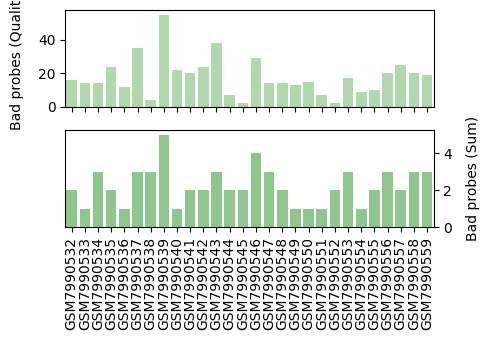

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("/content/pv_qc_2024-06-09_1/metrics_table.csv")
data['Number of bad probes (Quality)'] = data['Pct non-ctrl probes with quality below 20'] * data['Number of genes']
data['Number of bad probes (Quality)'] = data['Number of bad probes (Quality)'].round().astype(int)

fig, axes = plt.subplots(2, 1, figsize=(5, 3.5), sharex=True)

colors = sns.color_palette("Greens", 8)[2:]

# Bar chart 1: Median counts per hexagon
sns.barplot(x='Dataset', y='Number of bad probes (Quality)', data=data, ax=axes[0], color=colors[0])
axes[0].tick_params(axis='y', labelsize=10)
axes[0].set_ylabel('Bad probes (Quality)', fontsize=10, labelpad=10)

# Bar chart 2: Median density (cells per hexagon)
sns.barplot(x='Dataset', y='Number of bad probes (Sum)', data=data, ax=axes[1], color=colors[1])
axes[1].tick_params(axis='y', labelsize=10, left=False, right=True, labelleft=False, labelright=True)
axes[1].set_ylabel('Bad probes (Sum)', fontsize=10, labelpad=10)
axes[1].yaxis.set_label_position("right")

axes[-1].set_xticklabels(axes[-1].get_xticklabels(), rotation=90, fontsize=10)
axes[-1].set_xlabel('')

plt.tight_layout()
plt.savefig("barplot_pulmonary.svg")
plt.show()

In [ ]:
import numpy as np

In [ ]:
#import /Users/k23030440/Library/CloudStorage/OneDrive-King'sCollegeLondon/spatial_project/pv_qc_2024-04-29_12/probe_quality.csv
probe_quality = pd.read_csv("/content/pv_qc_2024-06-09_1/probe_quality.csv")
#/Users/k23030440/Library/CloudStorage/OneDrive-King'sCollegeLondon/spatial_project/pv_qc_2024-04-29_12/sum_stripplot.csv
probe_mean = pd.read_csv("/content/pv_qc_2024-06-09_1/sum_stripplot.csv")
#/Users/k23030440/Library/CloudStorage/OneDrive-King'sCollegeLondon/spatial_project/pv_qc_2024-04-29_12/morans_i.csv
probe_moransi = pd.read_csv("/content/pv_qc_2024-06-09_1/morans_i.csv")

#merge all of them on column gene and sample
merged = pd.merge(probe_quality, probe_mean, on=['gene', 'Sample'])
merged = pd.merge(merged, probe_moransi, on=['gene', 'Sample'])
#in merged create a color column which is blue if probe category is not Neg_control and red if it is
merged["color"] = np.where(merged["Probe category"] == "Neg_control", "red", "blue")
#order merged such that red is first then blue
merged = merged.sort_values(by=['color'],ascending=False)
merged.head()

,Probe_ID,Quality,Count,Dataset,Probe category_x,gene,Sample,Counts,Probe category_y,log_counts,p_x,fdr_x,Morans_I,Probe category,p_y,fdr_y,color
14701,NegControlCodeword_0515,10.300075,629,GSM7990559,Neg_control,NegControlCodeword_0515,GSM7990559,12.0,Neg_control,1.079181,1.0,1.0,-0.004367,Neg_control,1.0,1.0,red
5154,NegControlCodeword_0502,15.361419,67,GSM7990541,Neg_control,NegControlCodeword_0502,GSM7990541,16.0,Neg_control,1.204120,1.0,1.0,0.018036,Neg_control,1.0,1.0,red
5152,BLANK_0208,10.018980,151,GSM7990541,Neg_control,BLANK_0208,GSM7990541,1.0,Neg_control,0.000000,1.0,1.0,-0.000963,Neg_control,1.0,1.0,red
5151,BLANK_0315,8.925891,130,GSM7990541,Neg_control,BLANK_0315,GSM7990541,2.0,Neg_control,0.301030,1.0,1.0,-0.001928,Neg_control,1.0,1.0,red
5150,BLANK_0282,8.676493,97,GSM7990541,Neg_control,BLANK_0282,GSM7990541,1.0,Neg_control,0.000000,1.0,1.0,-0.000963,Neg_control,1.0,1.0,red


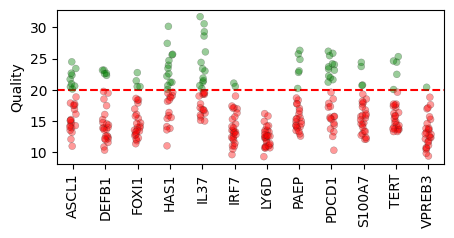

In [ ]:
#add a median quality colum, which calculates the median quality for each gene across samples
merged['median_quality'] = merged.groupby('gene')['Quality'].transform('median')
low_quality_genes_df = merged[merged['median_quality']<20]
#remove entries where Probe category is Neg_control
low_quality_genes_df = low_quality_genes_df[low_quality_genes_df['Probe category'] != 'Neg_control']
#set figsize to 2,5
plt.figure(figsize=(5,2))
import seaborn as sns
#reorder gene by alphabet
low_quality_genes_df = low_quality_genes_df.sort_values(by=['gene'])
sns.stripplot(x='gene', y='Quality', data=low_quality_genes_df,
              alpha=0.4, hue='Probe category_x', palette={'Good': 'green', 'Bad': 'red', 'Neg_control': 'yellow'},
              linewidth=0.3)
plt.xticks(rotation=90)
#remove x axis label
plt.xlabel('')
#draw a line at 20
plt.axhline(y=20, color='r', linestyle='--')
genes = low_quality_genes_df["gene"].unique()
plt.legend().remove()
plt.savefig("quality_pulmonary.svg")

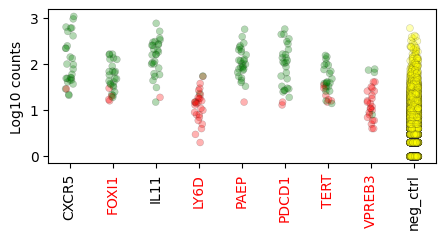

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Keep only those where Probe category_y is bad for a given gene at least once
bad_probes = merged[merged['Probe category_y'] == 'Bad']
bad_probes = bad_probes.groupby('gene').filter(lambda x: len(x) >= 0)
low_quality_genes_df = merged[merged['gene'].isin(bad_probes['gene'])]

# Add back all negative controls
low_quality_genes_df = pd.concat([low_quality_genes_df, merged[merged['Probe category'] == 'Neg_control']])

# Change gene name of all neg_control to neg_ctrl
low_quality_genes_df.loc[low_quality_genes_df['Probe category'] == 'Neg_control', 'gene'] = 'neg_ctrl'
low_quality_genes_df['Probe category'] = np.where(low_quality_genes_df['Probe category'] == 'Neg_control', 'Neg_Ctrl', 'Gene')

# Set figsize to 2,5
plt.figure(figsize=(5,2))

# Reorder gene by alphabet
low_quality_genes_df = low_quality_genes_df.sort_values(by=['gene'])

# Create the stripplot with blue for normal and yellow for neg ctrl
sns.stripplot(x='gene', y='log_counts', data=low_quality_genes_df,
              alpha=0.3, hue='Probe category_y', palette={'Good': 'green', 'Bad': 'red', 'Neg_control': 'yellow'},
              linewidth=0.3)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Log10 counts')
#those x ticks in genes should be marked with red
xtick_labels= plt.gca().get_xticklabels()
for label in xtick_labels:
    if label.get_text() in genes:
        label.set_color('red')
#remove legend
plt.legend().remove()
plt.savefig("sum_pulmonary.svg")